


- wage / salary prediction (and calculate accuracy)
- job matching based on qualification(calculate accuracy)
- save pickle file load model and takes input fron m the user and display matching jobs
- future : chatbot who takes input and suggests related jobs



- RFE 
- PCA  on one hot encoded data
- hyperparameter tuning (gridsearch) 
- post model ananysis (features and dependent variable correlation)

In [368]:
import pandas as pd
import numpy as np



##  1. Data Scrapping

The data for this project is scraped from the JOb bank of Canada Government (jobbank.gc.ca). First all the url were read for the job based on the filter by Province and Terrirories and based on those url of particular job all the job details were read and saved on the csv format.

In [369]:
df_on = pd.read_csv('./data/job_detail_ON_20400_03_29.csv')

In [370]:
print('Shape of Ontario dataset is:',df_on.shape)

Shape of Ontario dataset is: (20400, 16)


In [371]:
df_bc = pd.read_csv('./data/job_detail_BC_14380_03_31.csv')

In [372]:
print('Shape of British Columbia dataset is:',df_bc.shape)

Shape of British Columbia dataset is: (14380, 16)


In [373]:
df_ab = pd.read_csv('./data/job_detail_AB_13993_03_30.csv')

In [374]:
print('Shape of Alberta dataset is:',df_ab.shape)

Shape of Alberta dataset is: (13993, 16)


In [375]:
df_qc = pd.read_csv('./data/job_detail_QC_10805_03_30.csv')

In [376]:
print('Shape of Quebec dataset is:',df_qc.shape)

Shape of Quebec dataset is: (10805, 16)


In [377]:
df_other_prov = pd.read_csv('./data/job_detail_small_provinces_11852_03_31.csv')

In [378]:
print('Shape of Other Proviences dataset is:',df_other_prov.shape)

Shape of Other Proviences dataset is: (11852, 16)


In [379]:
# Concatinating dataset from all provinces to form a single dataframe
df = pd.concat([df_on,df_bc,df_ab,df_qc,df_other_prov],ignore_index=True)


## 2. Data Descreption and Wrangling

### 2.1 Understanding the data

In [380]:
df.shape

(71430, 16)

In [381]:
df.head(2)

,Title,Date Posted,Employer,Location,Salary,Work Hours,Employment Type,Start Date,Vacancies,Languages,Education,Experience,Responsibilities,Benefits,Valid Through,url
0,prosthetic assistant,"Posted on March 23, 2024",Metro,"Sarnia, ON",NaN,NaN,NaN,Starts as soon as possible,1 vacancy,NaN,NaN,NaN,NaN,NaN,2024-04-21,https://www.jobbank.gc.ca/jobsearch/jobposting...
1,cabinetmaker,"Posted on February 28, 2024",Sympro Mfg Inc.,"Mississauga, ON",27.00 HOUR,30 to 40 hours per week,Permanent employmentFull time,Starts as soon as possible,1 vacancy,English,Secondary (high) school graduation certificate,1 to less than 7 months,"Study plans, specifications or drawings of art...",NaN,2024-04-27,https://www.jobbank.gc.ca/jobsearch/jobposting...


In [382]:
df.tail(2)

,Title,Date Posted,Employer,Location,Salary,Work Hours,Employment Type,Start Date,Vacancies,Languages,Education,Experience,Responsibilities,Benefits,Valid Through,url
71428,personal support worker - home support,"Posted on February 19, 2024",Co-Care Health Group Inc,"Steinbach, MB",18.00 HOUR,40 hours per week,Permanent employmentFull time,Starts as soon as possible,1 vacancy,English,Secondary (high) school graduation certificate,1 year to less than 2 years,"Administer bedside and personal care, Administ...",NaN,2024-04-13,https://www.jobbank.gc.ca/jobsearch/jobposting...
71429,cook,"Posted on February 28, 2024",Kaapitaarvik Inc.,"Iqaluit, NU",24.00 HOUR,40 hours per week,Permanent employmentFull time,Starts as soon as possible,2 vacancies,English,Secondary (high) school graduation certificate,3 years to less than 5 years,Prepare and cook complete meals or individual ...,NaN,2024-04-28,https://www.jobbank.gc.ca/jobsearch/jobposting...


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71430 entries, 0 to 71429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             70750 non-null  object
 1   Date Posted       70750 non-null  object
 2   Employer          70750 non-null  object
 3   Location          70750 non-null  object
 4   Salary            57559 non-null  object
 5   Work Hours        43728 non-null  object
 6   Employment Type   66401 non-null  object
 7   Start Date        65359 non-null  object
 8   Vacancies         69324 non-null  object
 9   Languages         40150 non-null  object
 10  Education         40046 non-null  object
 11  Experience        40046 non-null  object
 12  Responsibilities  37734 non-null  object
 13  Benefits          12306 non-null  object
 14  Valid Through     62138 non-null  object
 15  url               71430 non-null  object
dtypes: object(16)
memory usage: 8.7+ MB


In [384]:
df.isnull().sum()

Title                 680
Date Posted           680
Employer              680
Location              680
Salary              13871
Work Hours          27702
Employment Type      5029
Start Date           6071
Vacancies            2106
Languages           31280
Education           31384
Experience          31384
Responsibilities    33696
Benefits            59124
Valid Through        9292
url                     0
dtype: int64

In [385]:
df.describe()

,Title,Date Posted,Employer,Location,Salary,Work Hours,Employment Type,Start Date,Vacancies,Languages,Education,Experience,Responsibilities,Benefits,Valid Through,url
count,70750,70750,70750,70750,57559,43728,66401,65359,69324,40150,40046,40046,37734,12306,62138,71430
unique,6771,117,35771,2856,4012,652,176,1,48,4,339,9,23461,3686,174,71383
top,food service supervisor,"Posted on March 26, 2024",NL Health Services,"Edmonton, AB",18.00 HOUR,40 hours per week,Permanent employmentFull time,Starts as soon as possible,1 vacancy,English,Secondary (high) school graduation certificate,1 year to less than 2 years,"Calculate and prepare cheques for payroll, Cal...",Free parking available,2024-04-24,https://www.jobbank.gc.ca/jobsearch/jobposting...
freq,2795,6050,528,4440,3234,13823,49723,65359,49095,37573,18444,13346,485,808,3202,5


### 2.2 Data wrangling

### 2.2.1 Handling inconsistent data

### 2.2.1.1 Duplicates

In [386]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 39


#### Observation:
There are 39 duplicated rows which might cause issue in EDA and analysis so we are going to drop them

In [387]:
# Drop duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

### 2.2.1.2 Inconsistent

In [388]:
# df['Work_hours'] = df['Work Hours'].str.extract(r'^(\d+.*\d+|\d+)')
# df['Work_hours_measure'] = df['Work Hours'].str.replace(r'^(\d+.*\d+|\d+)', '').str.strip()

df['Work_hours'] = df['Work Hours'].str.extract(r'^(\d+.*\d+|\d+)')
df['Work_hours_measure'] = df['Work Hours'].str.replace(r'^(\d+.*\d+|\d+)', '', regex=True).str.strip()


In [389]:
def handle_ranges(value):
    if isinstance(value, str) and 'to' in value:
        range_values = value.split(' to ')
        lower_bound = float(range_values[0])
        upper_bound = float(range_values[1])
        return (lower_bound + upper_bound) / 2  # Calculate average for range
    else:
        return float(value)  # Keep single numeric values unchanged

# Apply the function to handle ranges and compute averages
df['Work_hours'] = df['Work_hours'].apply(handle_ranges)

In [390]:
# creating a column which only stores salary unit in the numeric value form

df['Salary_numeric'] = df['Salary'].str.replace(',', '').str.extract(r'(\d+\.\d+|\d+)').astype(float)
df['Salary_measure'] = df['Salary'].str.extract(r'([A-Za-z]+)$')


In [391]:
# extracing number of vacancies announced and only storing the numeric count
df['Vacancies'] = pd.to_numeric(df['Vacancies'].str.extract('(\d+)', expand=False), errors='coerce')

In [392]:
# Remove "Posted on" and convert the remaining part to datetime
df['Date Posted'] = pd.to_datetime(df['Date Posted'].str.replace('Posted on ', ''))

In [393]:
df['Valid Through'] = pd.to_datetime(df['Valid Through'])

In [394]:
# Extracting the province code from the Locataion
province_pattern = r',\s*([A-Z]{2})\s*'
province_abbreviations = df['Location'].str.extract(province_pattern)[0]

# Create a set of unique province abbreviations
unique_province_abbreviations = set(province_abbreviations.dropna())

# Display the set
print(unique_province_abbreviations)

{'BC', 'NS', 'NL', 'MB', 'UN', 'PE', 'NB', 'NU', 'ON', 'SK', 'NT', 'AB', 'YT', 'QC'}


In [395]:
# adding a column Province and Territories in the dataset to make analysis easy based on the provinces
df['Province and Territories'] = province_abbreviations

In [396]:
# after manually varifying that the province UN obtained by data preprocessing is falls to ON and the mistake was made while
# pattern matching in the address column as that job had two locations
df.loc[df['Province and Territories'] == 'UN', 'Province and Territories'] = 'ON'

In [397]:
# printing the job counts based on the province and territories
grouped_df = df.groupby('Province and Territories')

print('Job count grouped by Provinces and Territories')
for province, group in grouped_df:
    print(f"{province}: {len(group)}")
 

Job count grouped by Provinces and Territories
AB: 13834
BC: 14296
MB: 2792
NB: 1602
NL: 1377
NS: 1943
NT: 138
NU: 64
ON: 19991
PE: 331
QC: 10800
SK: 3241
YT: 303


### 2.2.2 Handling Missing Values

In [398]:
# checking the dataset info after dropping the duplicated and rows with no job Title
# percentage_missing = (df.isnull().mean() * 100).round(2).astype(str) + '%'
# percentage_missing


# Looking at the null percentage of each columns
from tabulate import tabulate

# Calculate null percentage of each column
null_percentages = (df.isnull().mean() * 100).round(2).astype(str) + '%'

# Filter out columns with no missing values
null_percentages = null_percentages[null_percentages != '0.0%']

# Sort null percentages in descending order
null_percentages_sorted = null_percentages.sort_values(ascending=True)

# Create a list of lists containing column names and null percentages
data = []
for column, percentage in null_percentages_sorted.items():
    data.append([column, percentage])

# Define column headers
headers = ["Column", "Null Percentage"]

# Print the table using tabulate
print(tabulate(data, headers=headers, tablefmt="fancy_grid"))


╒══════════════════════════╤═══════════════════╕
│ Column                   │ Null Percentage   │
╞══════════════════════════╪═══════════════════╡
│ Title                    │ 0.95%             │
├──────────────────────────┼───────────────────┤
│ Location                 │ 0.95%             │
├──────────────────────────┼───────────────────┤
│ Province and Territories │ 0.95%             │
├──────────────────────────┼───────────────────┤
│ Date Posted              │ 0.95%             │
├──────────────────────────┼───────────────────┤
│ Employer                 │ 0.95%             │
├──────────────────────────┼───────────────────┤
│ Valid Through            │ 13.01%            │
├──────────────────────────┼───────────────────┤
│ Salary                   │ 19.43%            │
├──────────────────────────┼───────────────────┤
│ Salary_numeric           │ 19.43%            │
├──────────────────────────┼───────────────────┤
│ Salary_measure           │ 19.43%            │
├───────────────────

#### Observations:
Some of the columns has null count of around 50% or less which we can drop or impute based on their importance. Column Benefits has more than 83% null values so we are going to drop it. Beside That Job witout Title has all other columns so we are going to drop those rows as well


### 2.2.2.1 Droppoing Null Values

In [399]:
df.drop(['Benefits'], axis=1,inplace = True)

In [400]:
# dropping the rows which does not have the main column that is title or salary value
df.dropna(subset=['Title'], inplace=True)
df.dropna(subset=['Salary'], inplace=True)

### 2.2.2.2 Imputing Null Values with mode in suitable columns

In [401]:
languages_counts = df['Languages'].value_counts()

# Display unique values and their counts
print("Unique values and their counts in the 'Languages' column:")
print(languages_counts)

Unique values and their counts in the 'Languages' column:
English              37511
English or French     1196
French                1007
Bilingual              369
Name: Languages, dtype: int64


In [402]:
df['Start Date'].fillna('Starts as soon as possible', inplace = True)
# df['Benefits'].fillna('As company rules', inplace = True)
df['Responsibilities'].fillna('', inplace = True)
df['Employment Type'].fillna('Not available', inplace = True)
df['Languages'].fillna('English', inplace = True)
df['Education'].fillna('Basic level of literacy', inplace = True)
df['Experience'].fillna('No experience', inplace=True)





### 2.2.2.3 KNN Imputer

In [403]:
from sklearn.impute import KNNImputer


In [404]:

imputer = KNNImputer(n_neighbors=5)
df['Work_hours'] = imputer.fit_transform(df[['Work_hours']])



In [405]:
df['Vacancies'] = imputer.fit_transform(df[['Vacancies']])

### 2.2.3 Feature Engineering

Now we are going to find some columns from existing columns which might be more useful for the analysis

In [406]:
print("Top 5 salaries in the dataset is:")
top_5_salary_rows = df.loc[df['Salary_numeric'].nlargest(5).index]

# Display the top 5 rows
top_5_salary_rows

Top 5 salaries in the dataset is:


,Title,Date Posted,Employer,Location,Salary,Work Hours,Employment Type,Start Date,Vacancies,Languages,Education,Experience,Responsibilities,Valid Through,url,Work_hours,Work_hours_measure,Salary_numeric,Salary_measure,Province and Territories
70787,obstetrician-gynecologist,2024-03-18,SASKATCHEWAN HEALTH AUTHORITY,"Estevan, SK","503,523.88 YEAR",1760 hours per year,Permanent employmentFull time,Starts as soon as possible,1.0,English,"Degree in medicine, dentistry, veterinary medi...",Experience an asset,,2024-04-24,https://www.jobbank.gc.ca/jobsearch/jobposting...,1760.0,hours per year,503523.88,YEAR,SK
35612,psychiatrist,2024-03-14,Pearl Specialist Clinic,"Airdrie, AB","450,000 YEAR",38 to 45 hours per week,Permanent employmentFull time,Starts as soon as possible,2.0,English,"Degree in medicine, dentistry, veterinary medi...",3 years to less than 5 years,"Act as consultants to other physicians, Diagno...",2024-04-13,https://www.jobbank.gc.ca/jobsearch/jobposting...,41.5,hours per week,450000.00,YEAR,AB
63531,psychiatrist,2024-01-29,Saskatchewan Health Authority,"Prince Albert, SK","429,441.28 YEAR",40 hours per week,Permanent employmentFull time,Starts as soon as possible,2.0,English,"Degree in medicine, dentistry, veterinary medi...",7 months to less than 1 year,May conduct medical research on human disorder...,2024-04-17,https://www.jobbank.gc.ca/jobsearch/jobposting...,40.0,hours per week,429441.28,YEAR,SK
64025,child and adolescent psychiatrist,2024-02-22,Saskatchewan Health Authority (Prince Albert),"Prince Albert, SK","429,441 YEAR",1624 hours per year,Permanent employmentFull time,Starts as soon as possible,2.0,English,Earned doctorate degree\n\nor equivalent exper...,7 months to less than 1 year,May conduct medical research on human disorder...,2024-04-03,https://www.jobbank.gc.ca/jobsearch/jobposting...,1624.0,hours per year,429441.00,YEAR,SK
5474,emergency physician,2024-03-07,Peterborough Regional Health Centre,"Peterborough, ON","400,000 YEAR",1950 hours per year,Permanent employmentFull time,Starts as soon as possible,2.0,English,Earned doctorate degree,Experience an asset,,2024-04-06,https://www.jobbank.gc.ca/jobsearch/jobposting...,1950.0,hours per year,400000.00,YEAR,ON


In [407]:
# handling the various salary measure to compute a common measure of salary
df['Salary_measure'].unique()

array(['HOUR', 'YEAR', 'DAY', 'MONTH', 'WEEKLY', 'BIWEEKLY'], dtype=object)

In [408]:
df['Work_hours_measure'].unique()

array(['hours per week', nan, 'hours bi-weekly', 'hours per month',
       'hours per year'], dtype=object)

In [409]:
# df[df['Salary_measure']=='WEEKLY']
# df[df['Salary_measure']=='BIWEEKLY']
# df[df['Salary_measure']=='HOUR']
# df[df['Salary_measure']=='DAY'][:3]
# df[df['Salary_measure']=='YEAR'] #[:2]
# df[df['Salary_measure']=='MONTH'] #[:2]

In [410]:
# Condition to identify rows where Salary_measure is 'HOUR' and Salary_numeric is >= 500
condition = (df['Salary_measure'] == 'HOUR') & (df['Salary_numeric'] >= 500)

# Set Salary_measure to 'YEAR' for rows where the condition is met
df.loc[condition, 'Salary_measure'] = 'YEAR'


In [411]:
df['Salary'].isnull().sum()

0

In [412]:
# df[['Salary','Work Hours','Work_hours','Work_hours_measure']][df['Work_hours'].isna()]

In [413]:
# computing a monthly salary for all the jobs

def monthly_salary_calculator(row):
    Salary_numeric = row['Salary_numeric']
    Salary_measure = row['Salary_measure']
    Work_hours = row['Work_hours']
    Work_hours_measure = row['Work_hours_measure']
    
    if Salary_measure == 'HOUR':
#         if pd.isna(Work_hours) or pd.isna(Work_hours_measure):
            return Salary_numeric * 40 * 4
#         else:
#             return Salary_numeric * Work_hours *4
    elif Salary_measure == 'YEAR':
        return Salary_numeric / 12
    elif Salary_measure == 'DAY':
        return Salary_numeric * 20
    elif Salary_measure == 'MONTH':
        return Salary_numeric
    elif Salary_measure == 'WEEKLY':
        return Salary_numeric * 4
    elif Salary_measure == 'BIWEEKLY':
        return Salary_numeric * 2
    else:
        return None  # Handle undefined cases


In [414]:
df['Derived_Monthly_Salary'] = df.apply(monthly_salary_calculator, axis=1)


In [415]:
# df.isnull().sum()

In [416]:
df['Derived_Monthly_Salary'].mean()

4035.8573413043364

In [417]:
df['Work_hours'].mean()

39.76452440393028

In [418]:
df['advertisment_validuty_duration']  = (df['Valid Through'] - df['Date Posted']).dt.days

In [419]:
df['advertisment_validuty_duration'].isnull().sum()

7003

In [420]:
df['advertisment_validuty_duration'].mean() # 35.33

35.3345342254246

In [421]:
# advertisment posted for longer days of validataion
df[df['advertisment_validuty_duration']>200][:2]

,Title,Date Posted,Employer,Location,Salary,Work Hours,Employment Type,Start Date,Vacancies,Languages,...,Responsibilities,Valid Through,url,Work_hours,Work_hours_measure,Salary_numeric,Salary_measure,Province and Territories,Derived_Monthly_Salary,advertisment_validuty_duration
9802,"Regional Railway Inspector, Infrastructure",2024-03-22,Transport Canada - Surface,"Toronto, ON","95,304 YEAR",NaN,Permanent employmentFull time,Starts as soon as possible,1.0,English,...,,2024-12-31,https://www.jobbank.gc.ca/jobsearch/jobposting...,39.764524,NaN,95304.00,YEAR,ON,7942.0,284.0
25034,information coordinator,2024-03-28,City of Kamloops,"Kamloops, BC",42.62 HOUR,NaN,Permanent employmentFull time,Starts as soon as possible,1.0,English,...,,2025-02-11,https://www.jobbank.gc.ca/jobsearch/jobposting...,39.764524,NaN,42.62,HOUR,BC,6819.2,320.0


In [422]:
df['Experience'].unique()

array(['1 to less than 7 months', '2 years to less than 3 years',
       '3 years to less than 5 years', '7 months to less than 1 year',
       '1 year to less than 2 years', 'Experience an asset',
       'No experience', 'Will train', '5 years or more'], dtype=object)

In [423]:
df.isnull().sum()

Title                                 0
Date Posted                           0
Employer                              0
Location                              0
Salary                                0
Work Hours                        13860
Employment Type                       0
Start Date                            0
Vacancies                             0
Languages                             0
Education                             0
Experience                            0
Responsibilities                      0
Valid Through                      7003
url                                   0
Work_hours                            0
Work_hours_measure                13860
Salary_numeric                        0
Salary_measure                        0
Province and Territories              0
Derived_Monthly_Salary                0
advertisment_validuty_duration     7003
dtype: int64

In [424]:
df.loc[df['Education'].str.contains('Bachelor', case=False), 'Education'] = 'Bachelor Degree'

# Replace values containing 'Doctorate' with 'Doctorate Degree'
df.loc[df['Education'].str.contains('Doctorate', case=False), 'Education'] = 'Doctorate Degree'
df.loc[df['Education'].str.contains('Diploma', case=False), 'Education'] = 'Diploma Degree'
df.loc[df['Education'].str.contains('master', case=False), 'Education'] = 'Master Degree'
df.loc[df['Education'].str.contains('CEGEP', case=False), 'Education'] = 'CEGEP'
df.loc[df['Education'].str.contains('medicine', case=False), 'Education'] = 'Medicine/Dentistry Degree'
df.loc[df['Education'].str.contains('Secondary', case=False), 'Education'] = 'Secondary/School Level'
df.loc[df['Education'].str.contains('Apprenticeship', case=False), 'Education'] = 'Vocational Education'

In [425]:
df['Education'].unique()

array(['Secondary/School Level', 'Diploma Degree', 'CEGEP',
       'Basic level of literacy', 'Bachelor Degree', 'Master Degree',
       'Doctorate Degree', 'Vocational Education',
       'Medicine/Dentistry Degree'], dtype=object)

In [426]:
value_counts = df['Education'].value_counts()
print("Value Counts:",value_counts)
# print(value_counts)

Value Counts: Secondary/School Level       21713
Basic level of literacy      17541
Diploma Degree               12612
Bachelor Degree               2546
CEGEP                         2525
Vocational Education           229
Master Degree                  172
Medicine/Dentistry Degree      118
Doctorate Degree                65
Name: Education, dtype: int64


In [427]:
import re

def process_employment_type(entry):
    if isinstance(entry, str):
        # Check if the entry contains the pattern 'Term or contract (ending: date)Type'
        pattern = r'^Term or contract \(ending: \d{4}-\d{2}-\d{2}\)(.*)$'
        match = re.match(pattern, entry)
        
        if match:
            # Extract the employment type from the matched group
            employment_type = match.group(1).strip()
            
            # Remove any content inside parentheses
            employment_type = re.sub(r'\(.*\)', '', employment_type).strip()
            
            return f'Term of Contract {employment_type}'
        else:
            return entry
    else:
        return entry

# Apply the function to the 'Employment Type' column
df['Employment Type'] = df['Employment Type'].apply(process_employment_type)


In [428]:
df.loc[df['Employment Type'].str.contains('Part', case=False), 'Employment Type'] = 'Part Time'
df.loc[df['Employment Type'].str.contains('Permanent', case=False), 'Employment Type'] = 'Permanent Full Time'
df.loc[df['Employment Type'].str.contains('contract', case=False), 'Employment Type'] = 'Term or contract'
df.loc[df['Employment Type'].str.contains('Seasonal', case=False), 'Employment Type'] = 'Seasonal'
df.loc[df['Employment Type'].str.contains('casual', case=False), 'Employment Type'] = 'Seasonal'

In [429]:
df['Employment Type'].unique()

array(['Permanent Full Time', 'Term or contract', 'Full time',
       'Part Time', 'Not available', 'Seasonal'], dtype=object)

In [430]:
# checking how many unique job title we have in the dataset
print('Unique values of Job Title is:',len(pd.unique(df['Title'])))

Unique values of Job Title is: 6354


In [431]:
# Concatenate 'Title' and 'Responsibilities' columns
df['Title_and_Responsibilities_Text'] = df['Title'] + ' ' + df['Responsibilities']



In [432]:
df.head(2)

,Title,Date Posted,Employer,Location,Salary,Work Hours,Employment Type,Start Date,Vacancies,Languages,...,Valid Through,url,Work_hours,Work_hours_measure,Salary_numeric,Salary_measure,Province and Territories,Derived_Monthly_Salary,advertisment_validuty_duration,Title_and_Responsibilities_Text
1,cabinetmaker,2024-02-28,Sympro Mfg Inc.,"Mississauga, ON",27.00 HOUR,30 to 40 hours per week,Permanent Full Time,Starts as soon as possible,1.0,English,...,2024-04-27,https://www.jobbank.gc.ca/jobsearch/jobposting...,35.0,hours per week,27.0,HOUR,ON,4320.0,59.0,"cabinetmaker Study plans, specifications or dr..."
2,restoration carpenter,2024-03-18,Supra Restoration Services LTD,"Bradford, ON",30.00 HOUR,40 hours per week,Term or contract,Starts as soon as possible,3.0,English,...,2024-04-17,https://www.jobbank.gc.ca/jobsearch/jobposting...,40.0,hours per week,30.0,HOUR,ON,4800.0,30.0,restoration carpenter Read and interpret bluep...


In [433]:
# Deriving a job industry from Title and Responsibilities using the Topic Modeling

In [434]:
'''from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Function to perform text preprocessing
def preprocess_text(text):
    if isinstance(text, float):
        return ''
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return ' '.join(tokens)



# Pipeline for text preprocessing and topic modeling
pipeline = Pipeline([
    ('text_preprocessing', FunctionTransformer(lambda x: x['Title_and_Responsibilities_Text'].apply(preprocess_text))),
    ('vectorizer', CountVectorizer(max_df=0.95, min_df=2, max_features=1000)),
    ('topic_modeling', LatentDirichletAllocation(n_components=10, random_state=42))
])




# Fit pipeline to the concatenated text
pipeline.fit(df)

# Get the top words for each topic
vectorizer = pipeline.named_steps['vectorizer']
feature_names = vectorizer.get_feature_names_out()

topic_modeling = pipeline.named_steps['topic_modeling']
top_words_per_topic = []

for topic_idx, topic in enumerate(topic_modeling.components_):
    top_words_idx = topic.argsort()[:-11:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    top_words_per_topic.append(top_words)

# Print the top words for each topic
for i, words in enumerate(top_words_per_topic):
    print(f'Topic {i}: {" ".join(words)}')
    
    '''

'from sklearn.feature_extraction.text import CountVectorizer\nfrom sklearn.decomposition import LatentDirichletAllocation\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import FunctionTransformer\nfrom nltk.tokenize import word_tokenize\nfrom nltk.corpus import stopwords\nimport string\n\n# Function to perform text preprocessing\ndef preprocess_text(text):\n    if isinstance(text, float):\n        return \'\'\n    stop_words = set(stopwords.words(\'english\'))\n    tokens = word_tokenize(text.lower())\n    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]\n    return \' \'.join(tokens)\n\n\n\n# Pipeline for text preprocessing and topic modeling\npipeline = Pipeline([\n    (\'text_preprocessing\', FunctionTransformer(lambda x: x[\'Title_and_Responsibilities_Text\'].apply(preprocess_text))),\n    (\'vectorizer\', CountVectorizer(max_df=0.95, min_df=2, max_features=1000)),\n    (\'topic_modeling\', LatentDirichletAllocation

In [435]:
# Define the top words for each topic

top_words_per_topic = [
    ['clients', 'software', 'patients', 'develop', 'organization', 'programs', 'systems', 'policies', 'care'],
    ['maintain', 'prepare', 'information', 'telephone', 'financial', 'answer', 'office', 'electronic', 'assistant', 'service'],
    ['install', 'equipment', 'cut', 'using', 'materials', 'repair', 'products', 'operate', 'specifications', 'metal'],
    ['clean', 'food', 'wash', 'items', 'kitchen', 'customers', 'areas', 'tables', 'storage', 'appliances'],
    ['food', 'staff', 'service', 'prepare', 'schedules', 'supervise', 'work', 'establish', 'meet', 'ensure'],
    ['procedures', 'plan', 'administrative', 'office', 'children', 'evaluate', 'co', 'staff', 'ordinate', 'data'],
    ['sales', 'merchandise', 'customer', 'workers', 'supervise', 'retail', 'staff', 'inventory', 'maintain', 'resolve'],
    ['materials', 'construction', 'concrete', 'clean', 'assist', 'unload', 'load', 'sites', 'transport', 'asphalt'],
    ['food', 'cook', 'kitchen', 'supplies', 'prepare', 'equipment', 'areas', 'staff', 'dishes', 'service'],
    ['work', 'children', 'equipment', 'activities', 'repair', 'prepare', 'duties', 'co', 'ordinate', 'perform']
]

# Define industry topics
industry_topics = {
    0: 'Healthcare/Technical Software Solutions',
    1: 'Administrative Services',
    2: 'Industrial Equipment Services',
    3: 'Hospitality and Cleaning Services',
    4: 'Food Service Management',
    5: 'Childcare and Administrative Services',
    6: 'Retail Management',
    7: 'Construction and Materials Handling',
    8: 'Culinary Services',
    9: 'Childcare and Activities Coordination'
}

# Create a new column to store inferred industry topics
df['Job_Field'] = ''

# Function to assign industry topic based on top words
def assign_topic(row):
    text = row['Title_and_Responsibilities_Text']
    for topic, keywords in enumerate(top_words_per_topic):
        if any(keyword in text for keyword in keywords):
            return industry_topics[topic]
    return 'Unknown'

# Apply the function to assign industry topics
df['Job_Field'] = df.apply(assign_topic, axis=1)




In [436]:
# Display the DataFrame with the inferred industry topics
df[['Title_and_Responsibilities_Text', 'Job_Field']][10:20]

,Title_and_Responsibilities_Text,Job_Field
12,"farm supervisor Cut horticultural crops, Delea...",Industrial Equipment Services
13,retail store supervisor Supervise staff (appre...,Administrative Services
16,"bar manager Plan, organize, direct, control an...",Administrative Services
18,food service supervisor Establish methods to m...,Administrative Services
19,plumber helper Erect and dismantle concrete fo...,Industrial Equipment Services
20,truck driver-supervisor Prepare production and...,Industrial Equipment Services
21,administrative assistant,Administrative Services
24,personal support worker - home support Adminis...,Healthcare/Technical Software Solutions
26,administrative officer Review and evaluate new...,Healthcare/Technical Software Solutions
27,Managers in customer and personal services,Administrative Services


In [437]:
# df[df['Job_Field']=='Unknown']

In [438]:
# df[df['Job_Field']=='Unknown']

In [439]:
df.loc[df['Job_Field'].str.contains('Unknown', case=False), 'Job_Field'] = 'Logistics and Transportation'


In [440]:
df['Job_Field'].unique()

array(['Administrative Services',
       'Healthcare/Technical Software Solutions',
       'Industrial Equipment Services', 'Food Service Management',
       'Logistics and Transportation',
       'Hospitality and Cleaning Services',
       'Childcare and Administrative Services', 'Retail Management',
       'Construction and Materials Handling',
       'Childcare and Activities Coordination', 'Culinary Services'],
      dtype=object)

In [441]:
df.head(2)

,Title,Date Posted,Employer,Location,Salary,Work Hours,Employment Type,Start Date,Vacancies,Languages,...,url,Work_hours,Work_hours_measure,Salary_numeric,Salary_measure,Province and Territories,Derived_Monthly_Salary,advertisment_validuty_duration,Title_and_Responsibilities_Text,Job_Field
1,cabinetmaker,2024-02-28,Sympro Mfg Inc.,"Mississauga, ON",27.00 HOUR,30 to 40 hours per week,Permanent Full Time,Starts as soon as possible,1.0,English,...,https://www.jobbank.gc.ca/jobsearch/jobposting...,35.0,hours per week,27.0,HOUR,ON,4320.0,59.0,"cabinetmaker Study plans, specifications or dr...",Administrative Services
2,restoration carpenter,2024-03-18,Supra Restoration Services LTD,"Bradford, ON",30.00 HOUR,40 hours per week,Term or contract,Starts as soon as possible,3.0,English,...,https://www.jobbank.gc.ca/jobsearch/jobposting...,40.0,hours per week,30.0,HOUR,ON,4800.0,30.0,restoration carpenter Read and interpret bluep...,Healthcare/Technical Software Solutions


In [442]:
df['Job_Field'].value_counts()

Administrative Services                    17067
Healthcare/Technical Software Solutions    15217
Logistics and Transportation               10065
Industrial Equipment Services               7436
Childcare and Administrative Services       3204
Hospitality and Cleaning Services           2595
Retail Management                            945
Food Service Management                      894
Construction and Materials Handling           89
Childcare and Activities Coordination          8
Culinary Services                              1
Name: Job_Field, dtype: int64

In [443]:
# manual inspection and update some job field
'''filtered_df = df[df['Title_and_Responsibilities_Text'].str.contains('cook|chef', case=False)]
filtered_df ''' 

'''filtered_df = df[df['Title_and_Responsibilities_Text'].str.contains('software|engineer | nurse', case=False)]
filtered_df '''

'''filtered_df = df[df['Title_and_Responsibilities_Text'].str.contains('construction', case=False)]
filtered_df '''

'''filtered_df = df[df['Title_and_Responsibilities_Text'].str.contains('child care', case=False)]
filtered_df '''

"filtered_df = df[df['Title_and_Responsibilities_Text'].str.contains('child care', case=False)]\nfiltered_df "

In [444]:
df.loc[df['Title_and_Responsibilities_Text'].str.contains('software|engineer', case=False), 'Job_Field'] = 'Healthcare/Technical Software Solutions'
df.loc[df['Title_and_Responsibilities_Text'].str.contains('cook|chef', case=False), 'Job_Field'] = 'Culinary Services'
df.loc[df['Title_and_Responsibilities_Text'].str.contains('construction', case=False), 'Job_Field'] = 'Construction and Materials Handling'
df.loc[df['Title_and_Responsibilities_Text'].str.contains('child care', case=False), 'Job_Field'] = 'Childcare and Administrative Services'

In [445]:
df['Job_Field'].value_counts()

Healthcare/Technical Software Solutions    13787
Administrative Services                    13724
Logistics and Transportation                9560
Culinary Services                           5834
Industrial Equipment Services               5103
Construction and Materials Handling         2683
Childcare and Administrative Services       2641
Hospitality and Cleaning Services           2391
Retail Management                            945
Food Service Management                      845
Childcare and Activities Coordination          8
Name: Job_Field, dtype: int64

In [446]:

df.drop(columns=['Work Hours','Valid Through'], inplace=True)

In [447]:
df['Work_hours_measure'].fillna('hours per week',inplace=True )

In [448]:
df['Work_hours'].mean()

39.76452440393028

In [449]:
df['advertisment_validuty_duration'].mean()

35.3345342254246

In [450]:
df['advertisment_validuty_duration'] = imputer.fit_transform(df[['advertisment_validuty_duration']])

In [451]:
df['Vacancies'].mean()

1.9760285466975218

In [452]:
df.isnull().sum()

Title                              0
Date Posted                        0
Employer                           0
Location                           0
Salary                             0
Employment Type                    0
Start Date                         0
Vacancies                          0
Languages                          0
Education                          0
Experience                         0
Responsibilities                   0
url                                0
Work_hours                         0
Work_hours_measure                 0
Salary_numeric                     0
Salary_measure                     0
Province and Territories           0
Derived_Monthly_Salary             0
advertisment_validuty_duration     0
Title_and_Responsibilities_Text    0
Job_Field                          0
dtype: int64

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57521 entries, 1 to 71429
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Title                            57521 non-null  object        
 1   Date Posted                      57521 non-null  datetime64[ns]
 2   Employer                         57521 non-null  object        
 3   Location                         57521 non-null  object        
 4   Salary                           57521 non-null  object        
 5   Employment Type                  57521 non-null  object        
 6   Start Date                       57521 non-null  object        
 7   Vacancies                        57521 non-null  float64       
 8   Languages                        57521 non-null  object        
 9   Education                        57521 non-null  object        
 10  Experience                       57521 non-null  object   

In [454]:
#splitting into numeric and categorical dataframe
numeric_columns = df.select_dtypes(include=np.number).columns
categorical_columns = df.select_dtypes(exclude=np.number).columns

In [455]:
# filtered_values = df[df['Derived_Monthly_Salary'] < 2000]
# filtered_values
# filtered_values['Derived_Monthly_Salary'].mean()

print('Numeric Columns:')
numeric_columns



Numeric Columns:


Index(['Vacancies', 'Work_hours', 'Salary_numeric', 'Derived_Monthly_Salary',
       'advertisment_validuty_duration'],
      dtype='object')

In [456]:
print('Categorical Columns:')
categorical_columns

Categorical Columns:


Index(['Title', 'Date Posted', 'Employer', 'Location', 'Salary',
       'Employment Type', 'Start Date', 'Languages', 'Education', 'Experience',
       'Responsibilities', 'url', 'Work_hours_measure', 'Salary_measure',
       'Province and Territories', 'Title_and_Responsibilities_Text',
       'Job_Field'],
      dtype='object')

# Step 3: Exploratory Data Analysis (EDA)

## 3.1 Summary Statistics

In [457]:
# Calculate summary statistics
summary_stats = df.describe()
# Transpose for better readability
summary_stats_df = summary_stats.T

# Print the summary statistics table
print(tabulate(summary_stats_df, headers='keys', tablefmt='fancy_grid'))


╒════════════════════════════════╤═════════╤════════════╤═════════════╤══════════╤═══════╤═══════════╤═══════════╤════════╕
│                                │   count │       mean │         std │      min │   25% │       50% │       75% │    max │
╞════════════════════════════════╪═════════╪════════════╪═════════════╪══════════╪═══════╪═══════════╪═══════════╪════════╡
│ Vacancies                      │   57521 │    1.97603 │     3.56472 │  1       │     1 │    1      │    2      │    300 │
├────────────────────────────────┼─────────┼────────────┼─────────────┼──────────┼───────┼───────────┼───────────┼────────┤
│ Work_hours                     │   57521 │   39.7645  │    62.7576  │  1       │    35 │   39.7645 │   40      │   2190 │
├────────────────────────────────┼─────────┼────────────┼─────────────┼──────────┼───────┼───────────┼───────────┼────────┤
│ Salary_numeric                 │   57521 │ 6523.46    │ 23449.8     │ 12.2     │    18 │   23      │   29      │ 503524 │
├───────

## 3.2 Distribution of Numeric Variables

In [458]:
import seaborn as sns
import matplotlib.pyplot as plt

# num_plots = len(numeric_columns)
# # 4 columns per row
# num_cols = min(5, num_plots)

# num_rows = (num_plots - 1) // num_cols + 1

# fig, axes = plt.subplots(1, num_cols, figsize=(4 * num_cols, 4))

# # Iterate through numeric columns and plot each one
# for i, col in enumerate(numeric_columns):
#     ax = axes[i]

#     sns.histplot(df[col], kde=True, ax=ax,color='skyblue')
#     ax.set_title(f'Distribution of {col}')
#     ax.set_xlabel(col)
#     ax.set_ylabel('Frequency')

# # Remove empty plots if exists
# if num_plots < num_cols:
#     for i in range(num_plots, num_cols):
#         axes[i].remove()

# plt.tight_layout()
# plt.show()


## 3.3 Univaritae Analysis

### 3.3.1 Bar Chart

In [459]:
df.columns


Index(['Title', 'Date Posted', 'Employer', 'Location', 'Salary',
       'Employment Type', 'Start Date', 'Vacancies', 'Languages', 'Education',
       'Experience', 'Responsibilities', 'url', 'Work_hours',
       'Work_hours_measure', 'Salary_numeric', 'Salary_measure',
       'Province and Territories', 'Derived_Monthly_Salary',
       'advertisment_validuty_duration', 'Title_and_Responsibilities_Text',
       'Job_Field'],
      dtype='object')

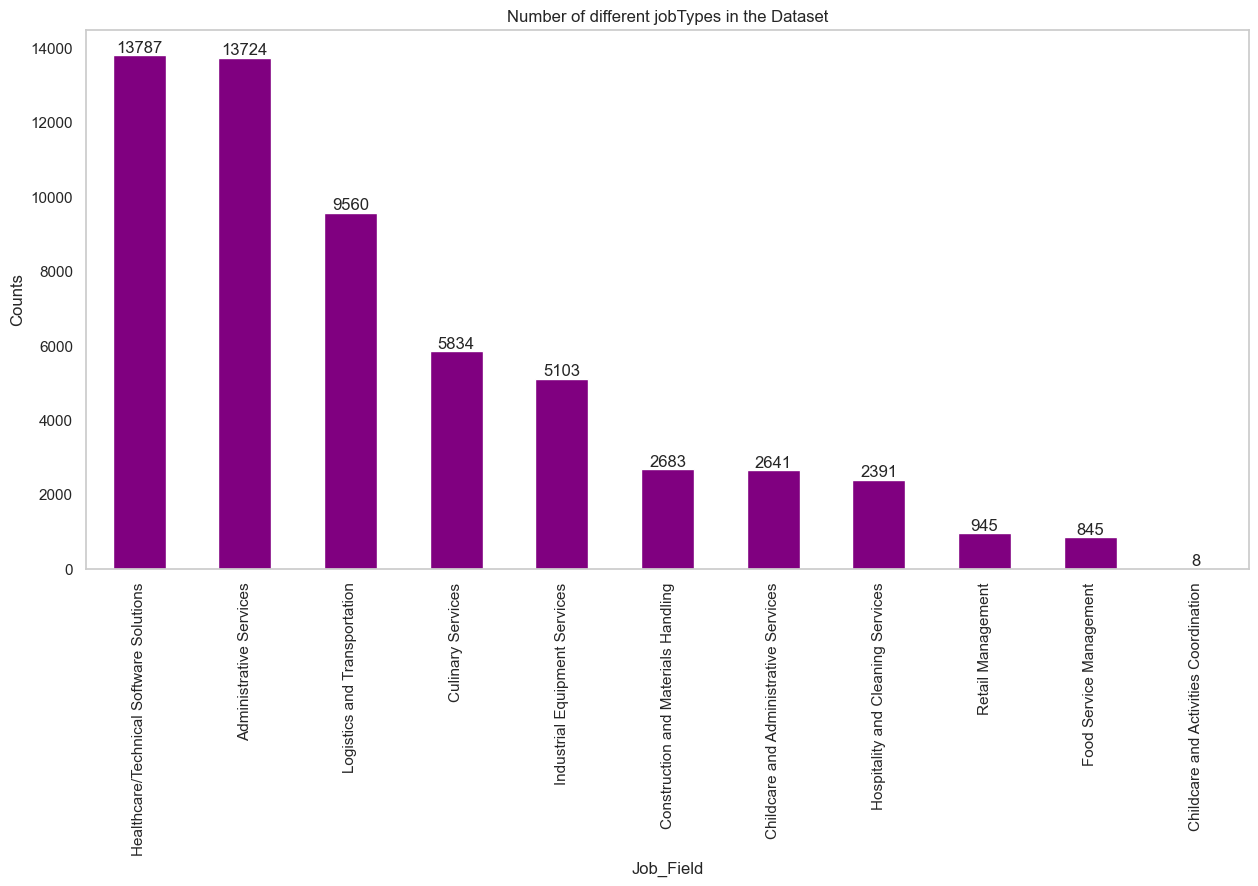

In [460]:
plt.figure(figsize=(15, 7))

# Sort the data in descending order
sorted_df = df.groupby('Job_Field')['Derived_Monthly_Salary'].count().sort_values(ascending=False)

# Plot the bar chart with reversed order
ax = sorted_df.plot(kind='bar', color='purple')

# Set title and labels
plt.title('Number of different jobTypes in the Dataset')
plt.ylabel('Counts')

# Remove background grid
ax.grid(False)

# Add annotations above each bar
for i, v in enumerate(sorted_df):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()


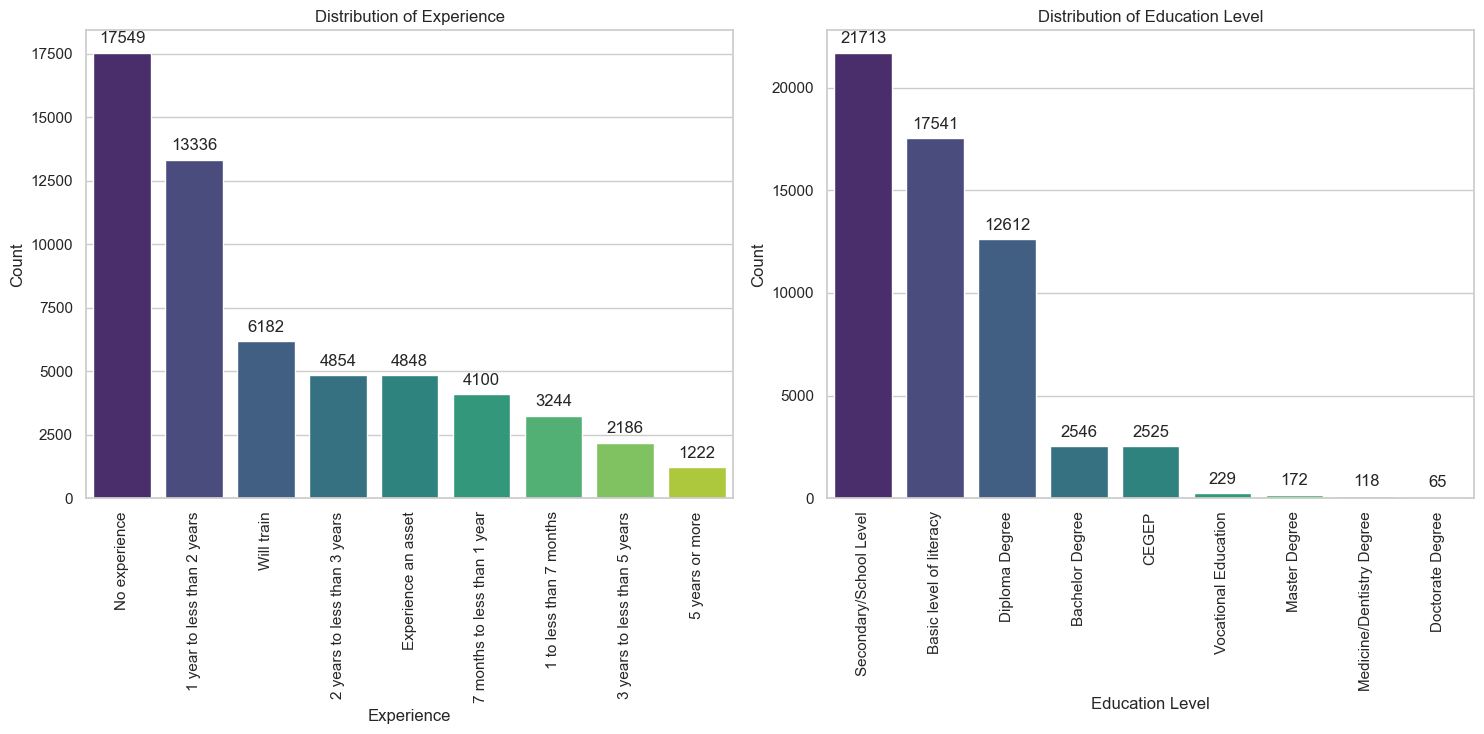

In [461]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 7.5))

# Plot the count of data points for each gender category in the first subplot
sns.countplot(x='Experience', data=df, ax=ax[0], order=df['Experience'].value_counts().index, palette='viridis')
# Annotate bars with counts
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot the count of data points for each education level category in the second subplot
sns.countplot(x='Education', data=df, ax=ax[1], order=df['Education'].value_counts().index, palette='viridis')
# Annotate bars with counts
for p in ax[1].patches:
    ax[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Rotate x-axis labels for both subplots
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)  # Rotate to strict vertical
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)  # Rotate to strict vertical

# Add labels and titles for the subplots
ax[0].set_xlabel('Experience')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Experience')

ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')

# Show the plots
plt.tight_layout()
plt.show()


In [462]:
df.columns

Index(['Title', 'Date Posted', 'Employer', 'Location', 'Salary',
       'Employment Type', 'Start Date', 'Vacancies', 'Languages', 'Education',
       'Experience', 'Responsibilities', 'url', 'Work_hours',
       'Work_hours_measure', 'Salary_numeric', 'Salary_measure',
       'Province and Territories', 'Derived_Monthly_Salary',
       'advertisment_validuty_duration', 'Title_and_Responsibilities_Text',
       'Job_Field'],
      dtype='object')

### 3.3.2 Pie Chart

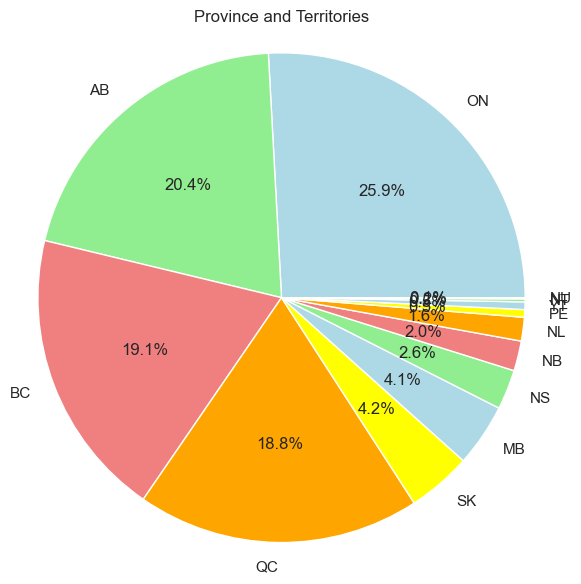

In [463]:
column_name = 'Province and Territories'
# Counting the occurrences of each unique value in the selected column
column_count = df[column_name].value_counts()
# explode = (0, 0, 0.1)

# Plotting the pie chart
plt.figure(figsize=(6, 6))

# color defination
colors = ['lightblue', 'lightgreen', 'lightcoral', 'orange', 'yellow']

plt.pie(column_count, labels=column_count.index, colors=colors,
        autopct='%1.1f%%')
plt.title(f'{column_name}')
plt.axis('equal')
plt.tight_layout()
plt.show()

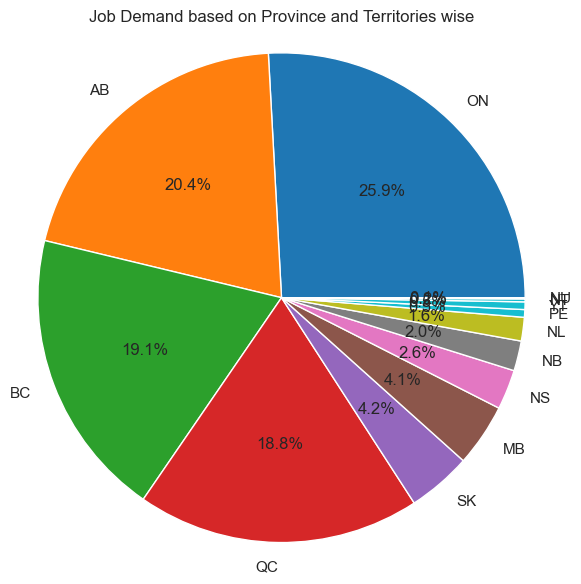

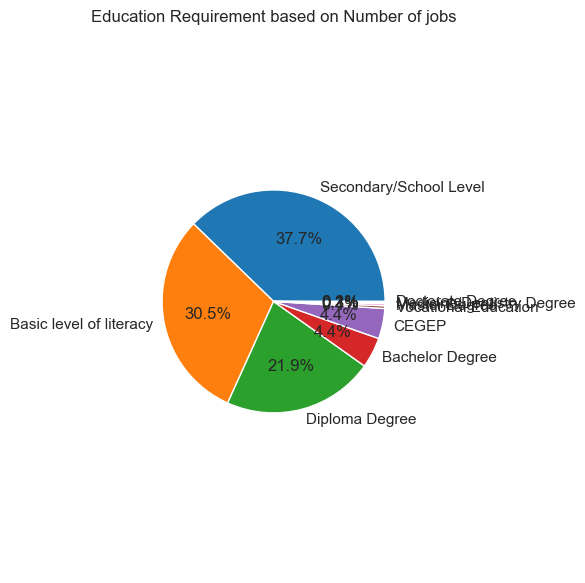

In [464]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pie_chart(df, column_name, title):
    # Counting the occurrences of each unique value in the selected column
    column_count = df[column_name].value_counts()

    # Generate a set of random colors
    num_colors = len(column_count)
    colors = plt.cm.tab10(np.arange(num_colors))

    # Plotting the pie chart
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(column_count, labels=column_count.index, colors=colors, autopct='%1.1f%%')
    ax.set_title(title)
    ax.axis('equal')
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming df is your DataFrame
# Plot pie chart for 'Province and Territories'
plot_pie_chart(df, 'Province and Territories', 'Job Demand based on Province and Territories wise')

# Plot pie chart for 'Education'
plot_pie_chart(df, 'Education', 'Education Requirement based on Number of jobs')


## 3.4 Bi- Variate Analysis

### 3.4.1 Bar Graph

In [465]:
df.columns

Index(['Title', 'Date Posted', 'Employer', 'Location', 'Salary',
       'Employment Type', 'Start Date', 'Vacancies', 'Languages', 'Education',
       'Experience', 'Responsibilities', 'url', 'Work_hours',
       'Work_hours_measure', 'Salary_numeric', 'Salary_measure',
       'Province and Territories', 'Derived_Monthly_Salary',
       'advertisment_validuty_duration', 'Title_and_Responsibilities_Text',
       'Job_Field'],
      dtype='object')

### 3.4.2 Sctter Plot

### 3.4.3 Correlation Matrix

C:\Users\TravelMate\AppData\Local\Temp\ipykernel_13192\1686788553.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


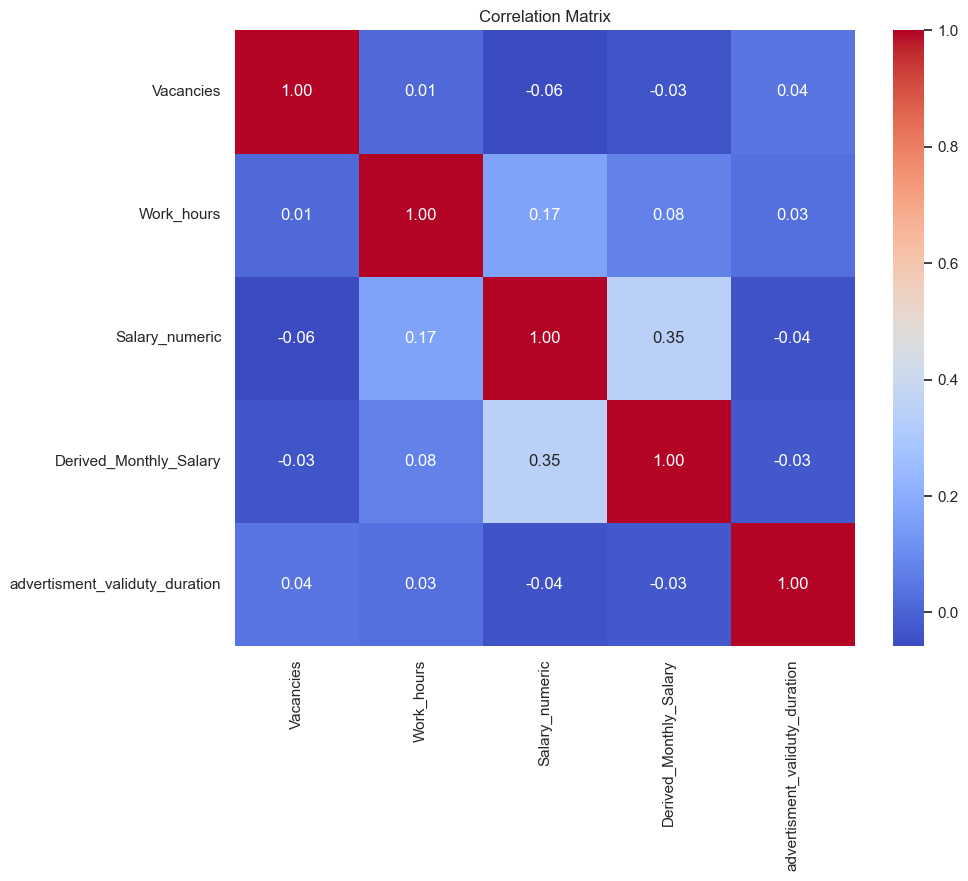

In [466]:
# Generate correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Step 4 : Using Pandas Profiling for EDA

In [529]:
# pip install --user ydata-profiling


In [533]:
# from ydata_profiling import ProfileReport


In [532]:
# profile = ProfileReport(df, title="Profiling Report")


In [531]:
# profile.to_file('pandas_profiling_report_job_bank.html')




# Step 5 : Data Encoding for categorical column

## 5.1 Custom Encoding method based on scenarios 

## 5.2 Label Encoding

In [467]:
# Ordinal encoding to handle the categorical values of experience

from sklearn.preprocessing import OrdinalEncoder


experience_order = ['No experience', 'Will train', 'Experience an asset', 
                    '1 to less than 7 months', '7 months to less than 1 year', 
                    '1 year to less than 2 years', '2 years to less than 3 years', 
                    '3 years to less than 5 years', '5 years or more']

# Initialize the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[experience_order])

# Fit and transform the 'Experience' column
df['Experience_encoded'] = ordinal_encoder.fit_transform(df[['Experience']])

In [468]:
df[['Experience','Experience_encoded']][:10]

,Experience,Experience_encoded
1,1 to less than 7 months,3.0
2,2 years to less than 3 years,6.0
3,3 years to less than 5 years,7.0
5,7 months to less than 1 year,4.0
6,7 months to less than 1 year,4.0
7,7 months to less than 1 year,4.0
8,1 year to less than 2 years,5.0
9,1 year to less than 2 years,5.0
10,1 to less than 7 months,3.0
11,1 year to less than 2 years,5.0


In [469]:
## Ed=ncoding for education level
# Define a dictionary mapping each education level to its corresponding value
education_mapping = {
    
    'Basic level of literacy': 1,
    'Vocational Education': 2,
    'Secondary/School Level': 3,
    'CEGEP': 4,
    'Diploma Degree': 5,
    'Bachelor Degree': 6, 
    'Master Degree': 7,
    'Medicine/Dentistry Degree': 8,
    'Doctorate Degree': 9
}

# Apply the mapping to the 'Education' column
df['Education_Encoded'] = df['Education'].map(education_mapping)

# Display the encoded values


In [470]:
df[['Education', 'Education_Encoded']]


,Education,Education_Encoded
1,Secondary/School Level,3
2,Secondary/School Level,3
3,Diploma Degree,5
5,Diploma Degree,5
6,Secondary/School Level,3
...,...,...
71425,Secondary/School Level,3
71426,Diploma Degree,5
71427,Bachelor Degree,6
71428,Secondary/School Level,3


In [471]:
job_field_mapping = {
    
       'Healthcare/Technical Software Solutions':11,
       'Construction and Materials Handling':10,
       'Logistics and Transportation':9,
       'Childcare and Administrative Services':8,
       'Food Service Management':7,
       'Industrial Equipment Services':6,    
       'Administrative Services':5,
       'Retail Management':4,
       'Childcare and Activities Coordination':3, 
       'Hospitality and Cleaning Services':2,
       'Culinary Services':1
    
}

# Apply the mapping to the 'Education' column
df['Job_Field_Encoded'] = df['Job_Field'].map(job_field_mapping)

In [472]:
job_type_mapping = {
    
    
    'Permanent Full Time': 6,
     'Full time': 5,
    'Term or contract': 4,
    'Part Time': 3,
    'Seasonal': 2 , 
    'Not available': 1,
}

# Apply the mapping to the 'Education' column
df['Employment_Type_Encoded'] = df['Employment Type'].map(job_type_mapping)

In [473]:
df['Employment_Type_Encoded'].unique()

array([6, 4, 5, 3, 1, 2], dtype=int64)

## 5.3 One Hot Encoding

# Step 6:  Outlier Detection

In [474]:
# finding the categorical and numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns
categorical_columns = df.select_dtypes(exclude=np.number).columns

In [475]:
print('Numeric columns:\n',numeric_columns)
print('Categorical columns:\n',categorical_columns)

Numeric columns:
 Index(['Vacancies', 'Work_hours', 'Salary_numeric', 'Derived_Monthly_Salary',
       'advertisment_validuty_duration', 'Experience_encoded',
       'Education_Encoded', 'Job_Field_Encoded', 'Employment_Type_Encoded'],
      dtype='object')
Categorical columns:
 Index(['Title', 'Date Posted', 'Employer', 'Location', 'Salary',
       'Employment Type', 'Start Date', 'Languages', 'Education', 'Experience',
       'Responsibilities', 'url', 'Work_hours_measure', 'Salary_measure',
       'Province and Territories', 'Title_and_Responsibilities_Text',
       'Job_Field'],
      dtype='object')


In [476]:
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [477]:
def generate_plots(df, column, handled_outliers=False):
    # Set up the figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    title = ' of '+column + (' after' if handled_outliers else ' before') + ' outlier handling'

    # boxplot
    sns.boxplot(y=df[column], orient='v', color='skyblue', ax=axes[0], showfliers=False)
    axes[0].set_title('Boxplot '+ title)
    axes[0].set_ylabel(column)

    # histogram
    axes[1].hist(df[column], bins=100,color='skyblue')
    axes[1].set_title('Histogram '+ title)
    axes[1].set_xlabel('Values')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

## 6.1 IQR

In [478]:
import numpy as np

# Define a function for outlier detection using IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers, Q1, Q3, IQR

In [479]:
data = []

for n_c in numeric_columns:
    outliers, Q1, Q3, IQR = detect_outliers_iqr(df[n_c])
    num_outliers = outliers.sum()
    data.append([n_c, num_outliers, Q1, Q3, IQR])

# Define the column headers
headers = ["Numeric Column", "Number of Outliers", "Q1", "Q3", "IQR"]

# Print the table using tabulate
print(tabulate(data, headers=headers, tablefmt="fancy_grid"))

╒════════════════════════════════╤══════════════════════╤══════╤═══════════╤════════════╕
│ Numeric Column                 │   Number of Outliers │   Q1 │        Q3 │        IQR │
╞════════════════════════════════╪══════════════════════╪══════╪═══════════╪════════════╡
│ Vacancies                      │                 5424 │    1 │    2      │    1       │
├────────────────────────────────┼──────────────────────┼──────┼───────────┼────────────┤
│ Work_hours                     │                 2534 │   35 │   40      │    5       │
├────────────────────────────────┼──────────────────────┼──────┼───────────┼────────────┤
│ Salary_numeric                 │                 7420 │   18 │   29      │   11       │
├────────────────────────────────┼──────────────────────┼──────┼───────────┼────────────┤
│ Derived_Monthly_Salary         │                 3729 │ 2880 │ 4480      │ 1600       │
├────────────────────────────────┼──────────────────────┼──────┼───────────┼────────────┤
│ advertis

### Observation
Columns which were categorical and has converted to numerical does not have outliers (Experience encoded column) whereas other columns which were scrapped values has outliers

In [480]:
# df['Employment_Type_Encoded'].unique()

In [481]:
df.drop(columns=['Salary_numeric'],inplace = True)

In [482]:
#columns with outliers needs treatment
outlier_columns = ['Vacancies','Work_hours','Derived_Monthly_Salary','advertisment_validuty_duration','Employment_Type_Encoded']

## 6.2 Box Plots

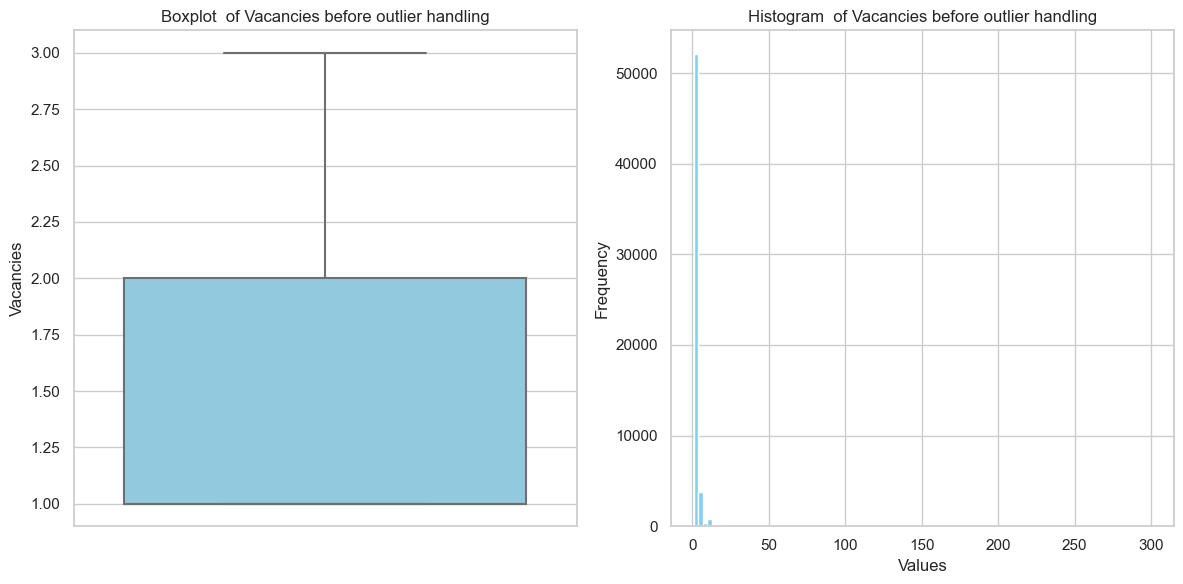

In [483]:
generate_plots(df,'Vacancies')

In [484]:
# generate_plots(df,'Salary_numeric')


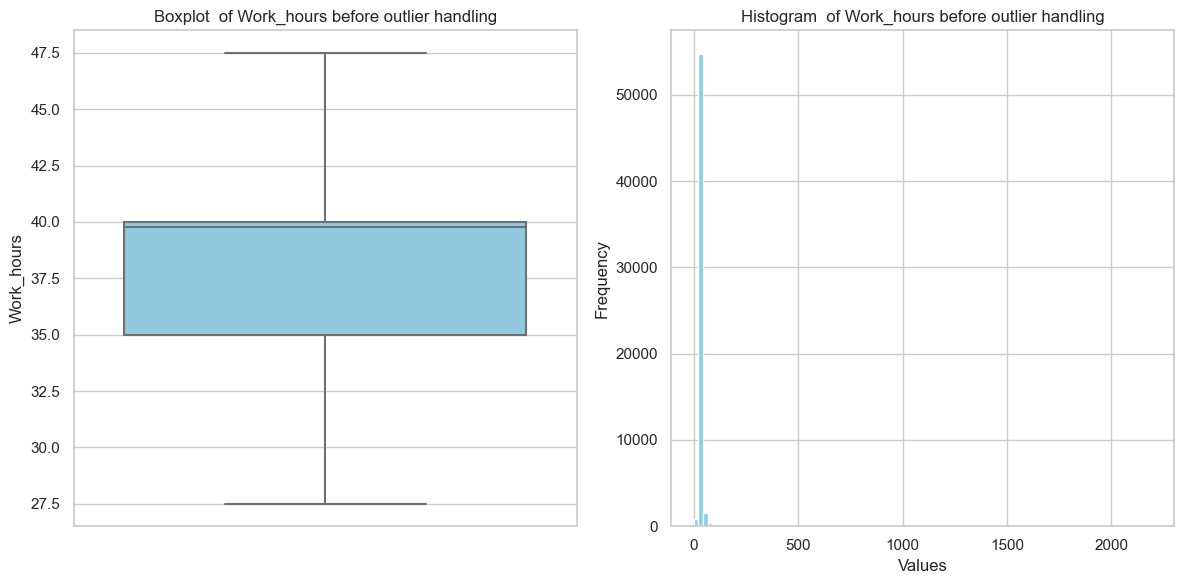

In [485]:
generate_plots(df,'Work_hours')


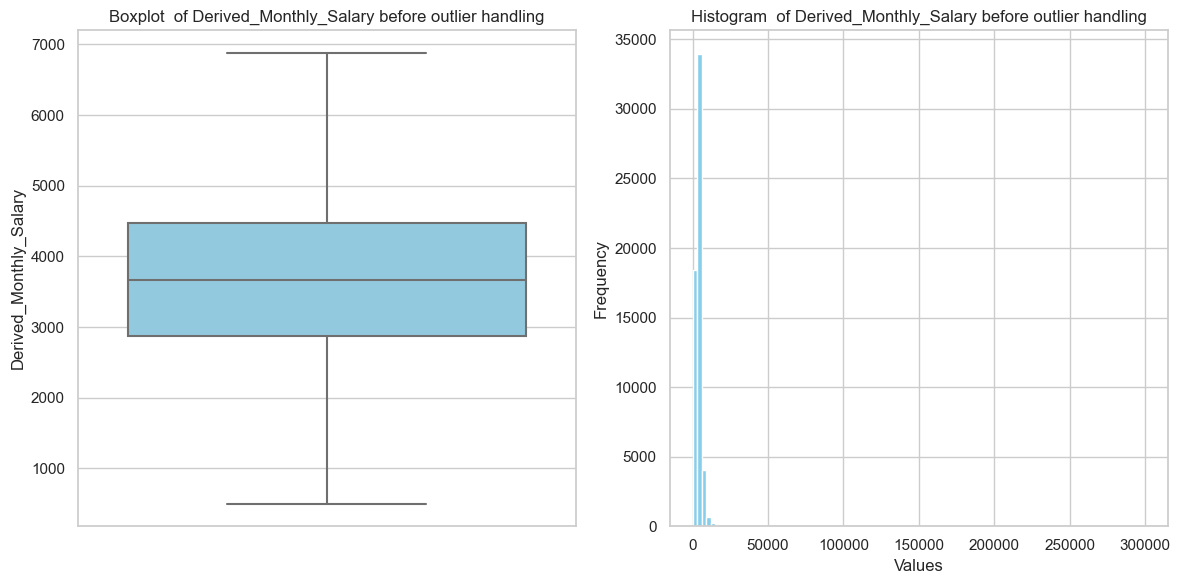

In [486]:
generate_plots(df,'Derived_Monthly_Salary')


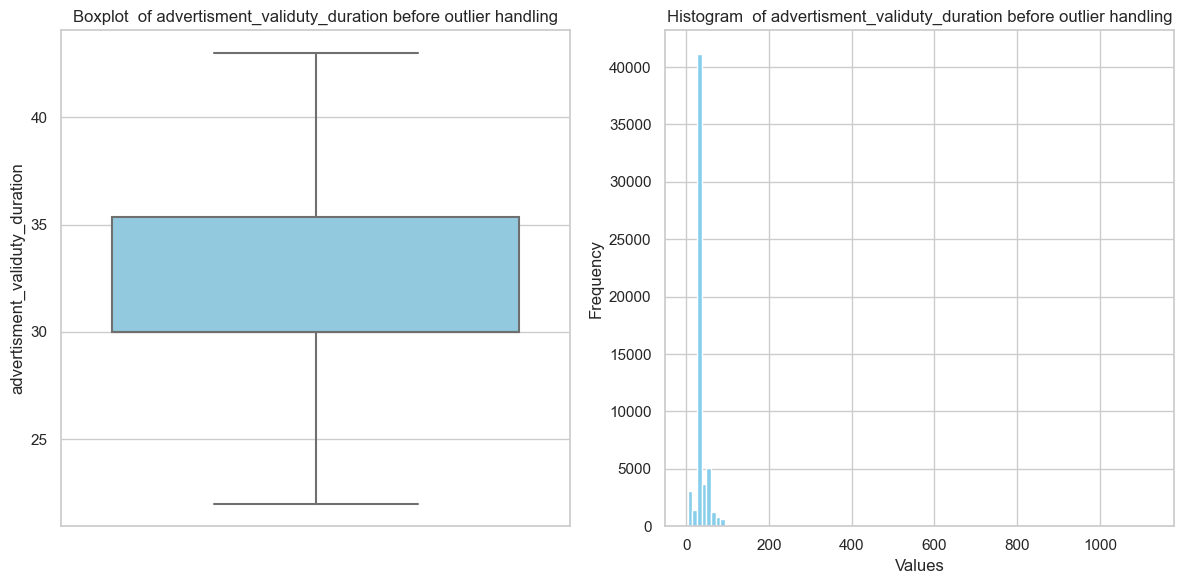

In [487]:
generate_plots(df,'advertisment_validuty_duration')


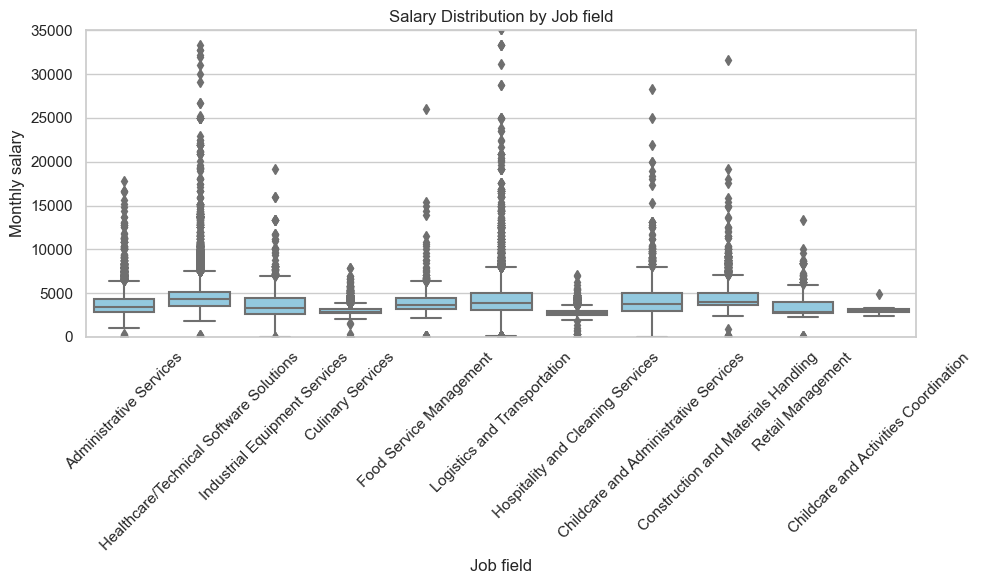

In [488]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Job_Field', y='Derived_Monthly_Salary', data=df, color='skyblue')

# Add title and labels
plt.title('Salary Distribution by Job field')
plt.xlabel('Job field')
plt.ylabel('Monthly salary')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Set the y-axis limits
plt.ylim(0, 35000)  # Adjust the upper limit to provide some space above the maximum salary

# Show the plot
plt.tight_layout()
plt.show()


In [489]:
df['Derived_Monthly_Salary'].max()

300000.0

# Step 7 Outlier Treatment

## 7.1 using Quantile based Flooring and Capping

In [490]:
def quantile_flooring_and_capping(df, columns_to_process, floor_quantile=0.1, cap_quantile=0.9):
    # copy the dataframe to avoid modifying original
    df_processed = df.copy()

    # Iterate over each column to process
    for column in columns_to_process:
        # Calculate thresholds for flooring and capping
        floor_threshold = df_processed[column].quantile(floor_quantile)
        cap_threshold = df_processed[column].quantile(cap_quantile)

        # Floor values below the floor threshold
        df_processed[column] = df_processed[column].apply(lambda x: floor_threshold if x < floor_threshold else x)

        # Cap values above the cap threshold
        df_processed[column] = df_processed[column].apply(lambda x: cap_threshold if x > cap_threshold else x)

    return df_processed

In [491]:
df_flooring_and_capping = quantile_flooring_and_capping(df, outlier_columns)


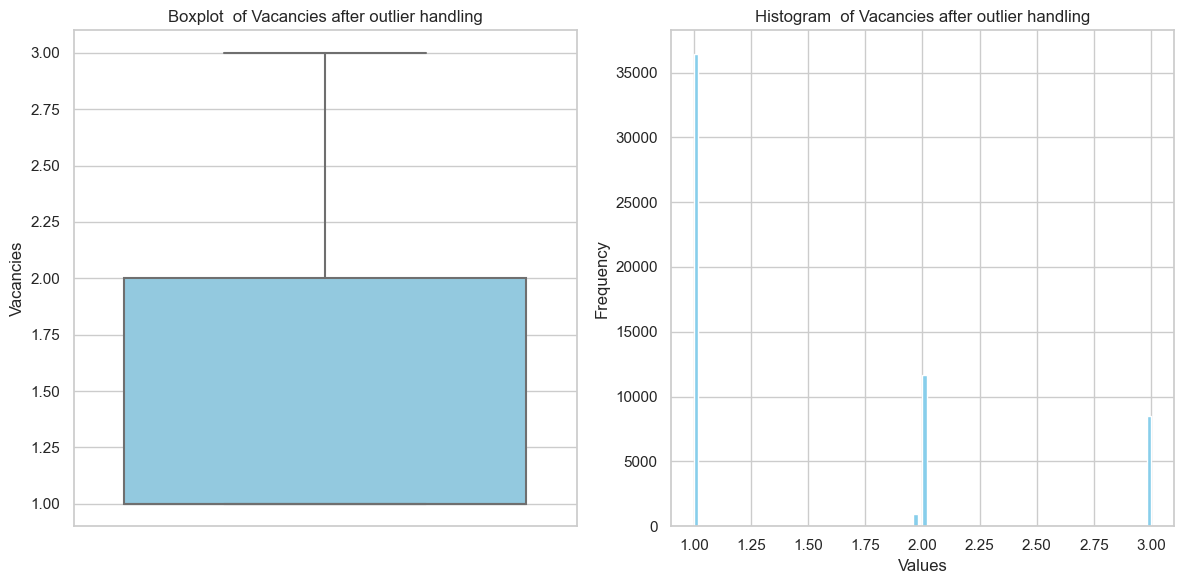

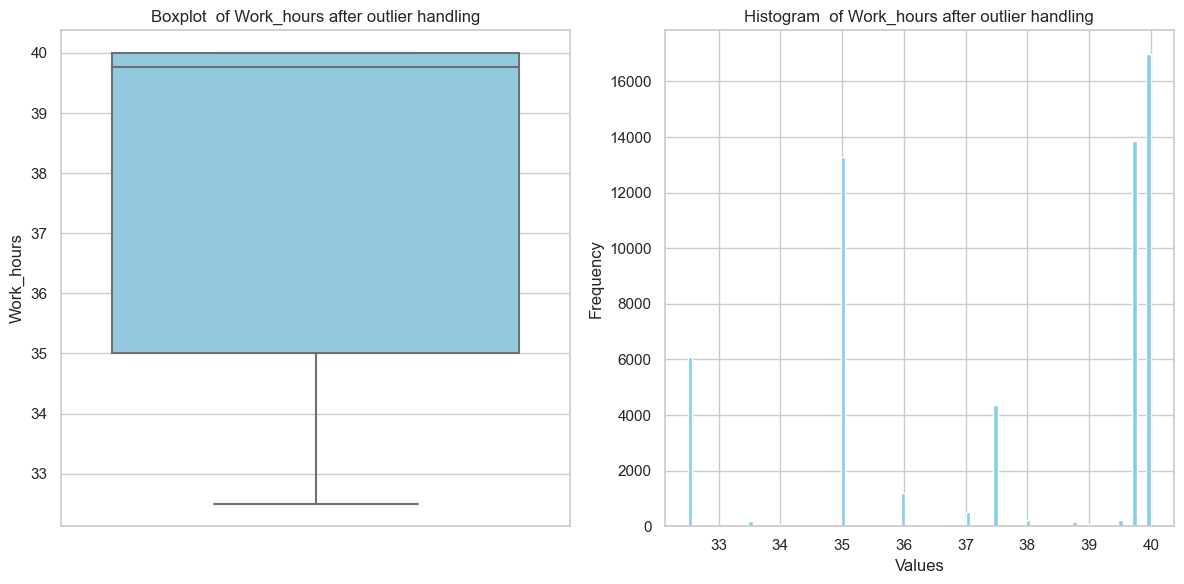

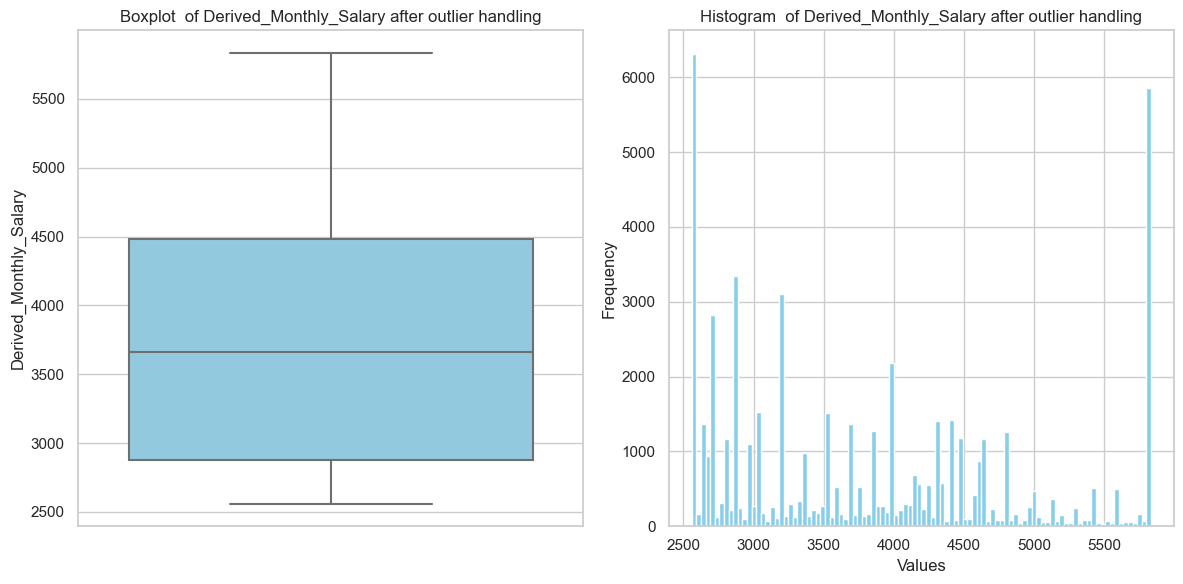

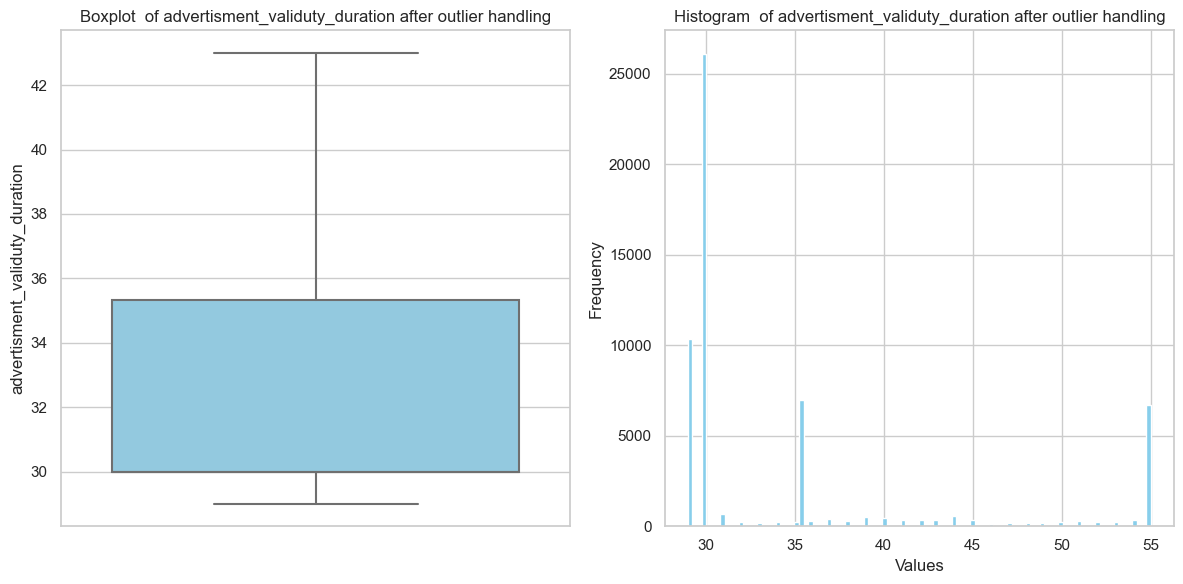

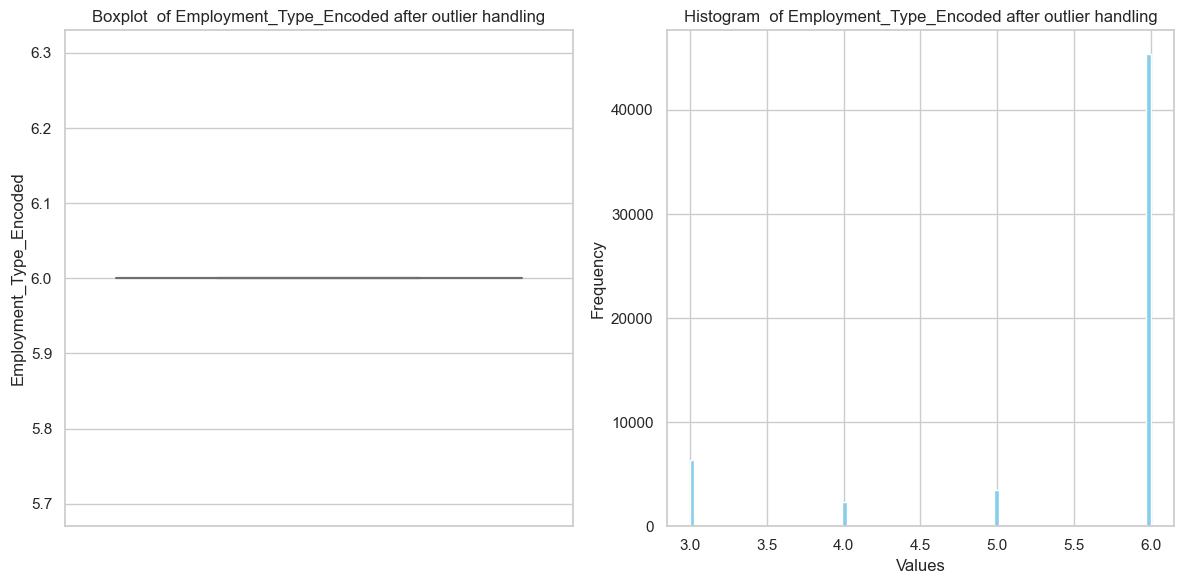

In [492]:
for col in outlier_columns:
  generate_plots(df_flooring_and_capping,col, True)

In [493]:
df_flooring_and_capping['Derived_Monthly_Salary'].mean()

3814.3251300829265

In [494]:
df_1_floor_capped = df_flooring_and_capping.copy()

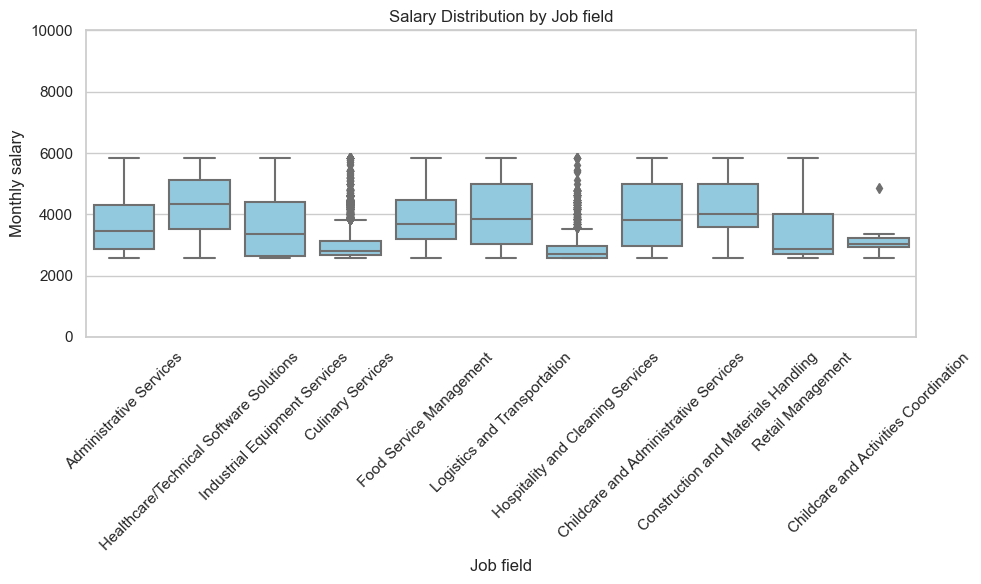

'DEFINE A FUNCTION TO GENERATE THIS PLOT FOR BEFORE AND AFTER'

In [495]:
# Outlier after treatment
# Set the style for seaborn
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Job_Field', y='Derived_Monthly_Salary', data=df_flooring_and_capping, color='skyblue')

# Add title and labels
plt.title('Salary Distribution by Job field')
plt.xlabel('Job field')
plt.ylabel('Monthly salary')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Set the y-axis limits
plt.ylim(0, 10000)  # Adjust the upper limit to provide some space above the maximum salary

# Show the plot
plt.tight_layout()
plt.show()



'''DEFINE A FUNCTION TO GENERATE THIS PLOT FOR BEFORE AND AFTER'''



## 7.2 Log Tramsformation

In [496]:
import numpy as np

def log_transform(df, column):
    # Make a copy of the DataFrame to avoid modifying the original data
    df_log_transformed = df.copy()

    # Apply log transformation to the specified column
    df_log_transformed[column] = np.log(df_log_transformed[column])

    return df_log_transformed

In [497]:
df_log = log_transform(df, outlier_columns)


In [498]:
for column in outlier_columns:
    # Check for negative or zero values in the columns
    negative_values = (df[column] < 0).sum()
    zero_values = (df[column] == 0).sum()
    print(column)

    # Print the counts
    print(f"Number of negative values: {negative_values}")
    print(f"Number of zero values: {zero_values}")

    # Check if there are any negative or zero values
    if negative_values > 0 or zero_values > 0:
        print("Warning: The column contains negative or zero values. Log transformation may not be appropriate.")
    else:
        print("No negative or zero values found. Log transformation can be applied.")

Vacancies
Number of negative values: 0
Number of zero values: 0
No negative or zero values found. Log transformation can be applied.
Work_hours
Number of negative values: 0
Number of zero values: 0
No negative or zero values found. Log transformation can be applied.
Derived_Monthly_Salary
Number of negative values: 0
Number of zero values: 0
No negative or zero values found. Log transformation can be applied.
advertisment_validuty_duration
Number of negative values: 0
Number of zero values: 0
No negative or zero values found. Log transformation can be applied.
Employment_Type_Encoded
Number of negative values: 0
Number of zero values: 0
No negative or zero values found. Log transformation can be applied.


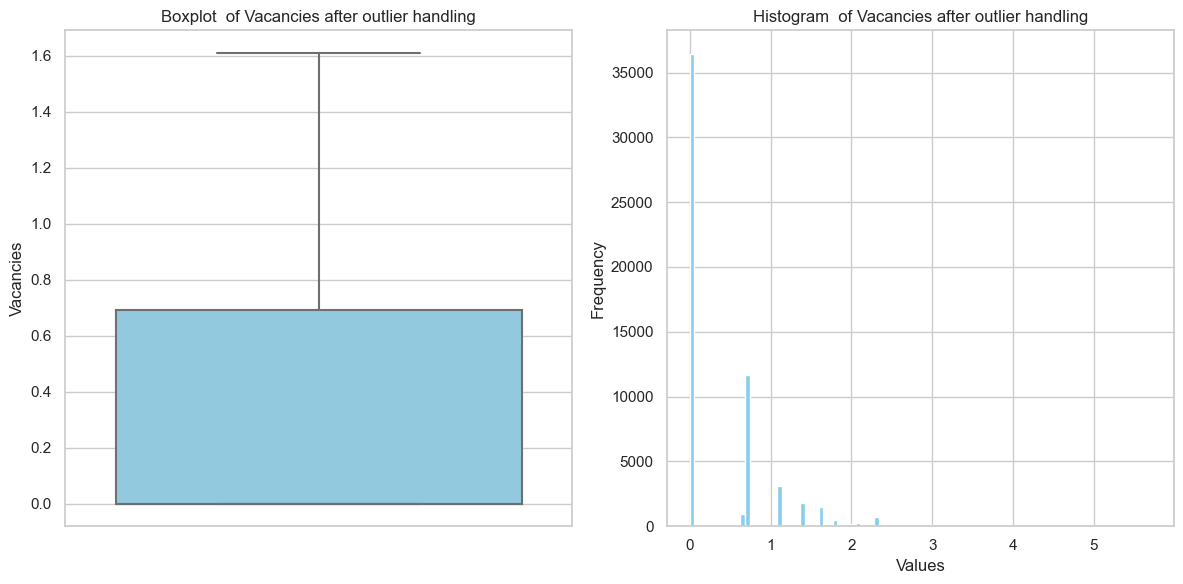

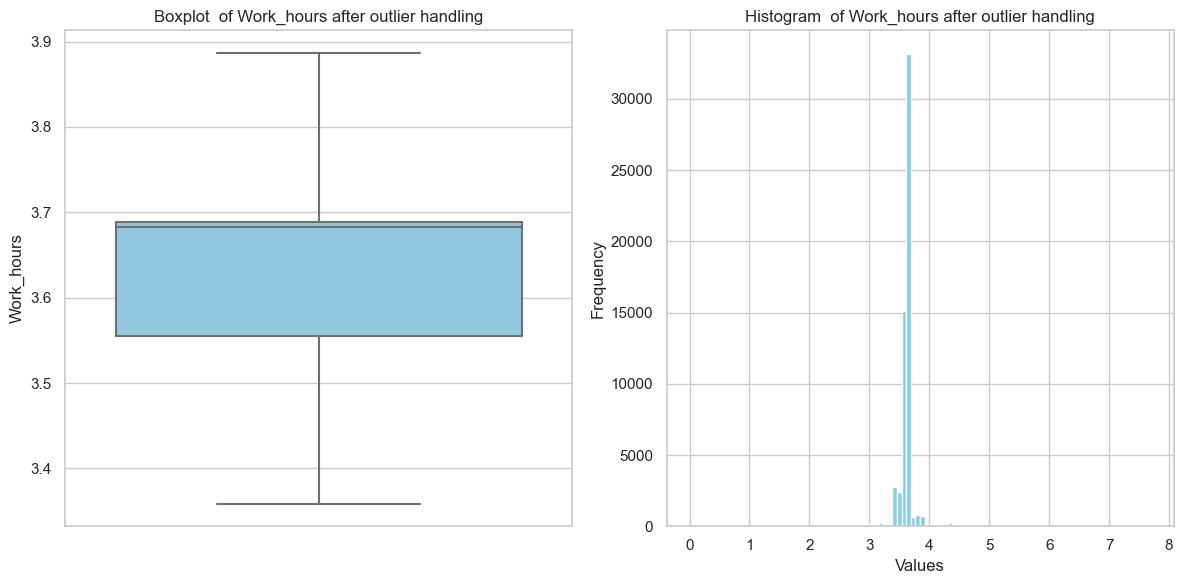

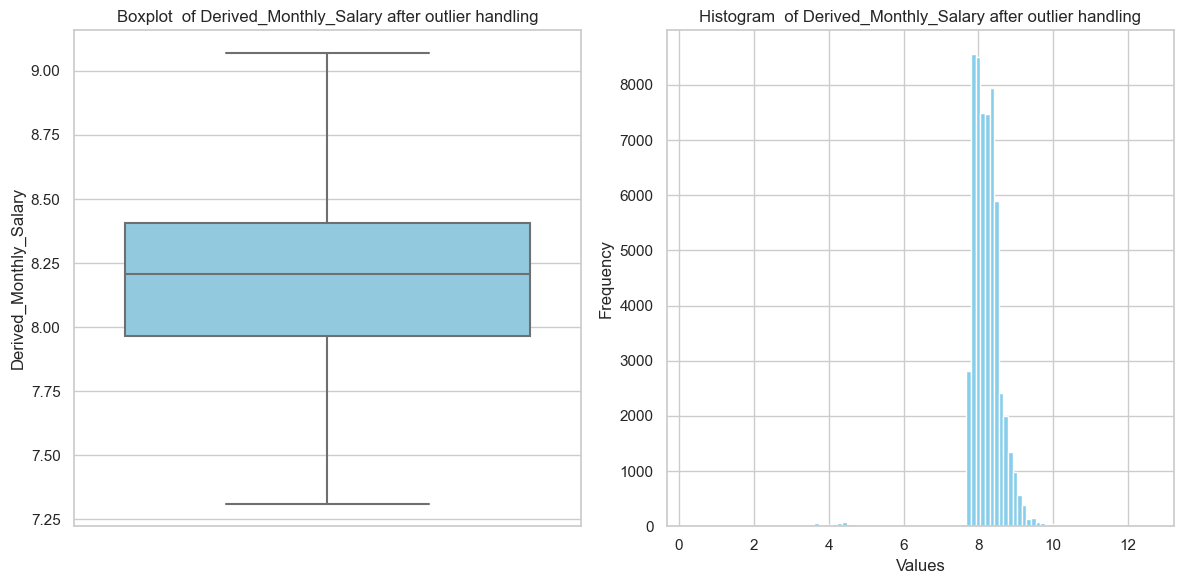

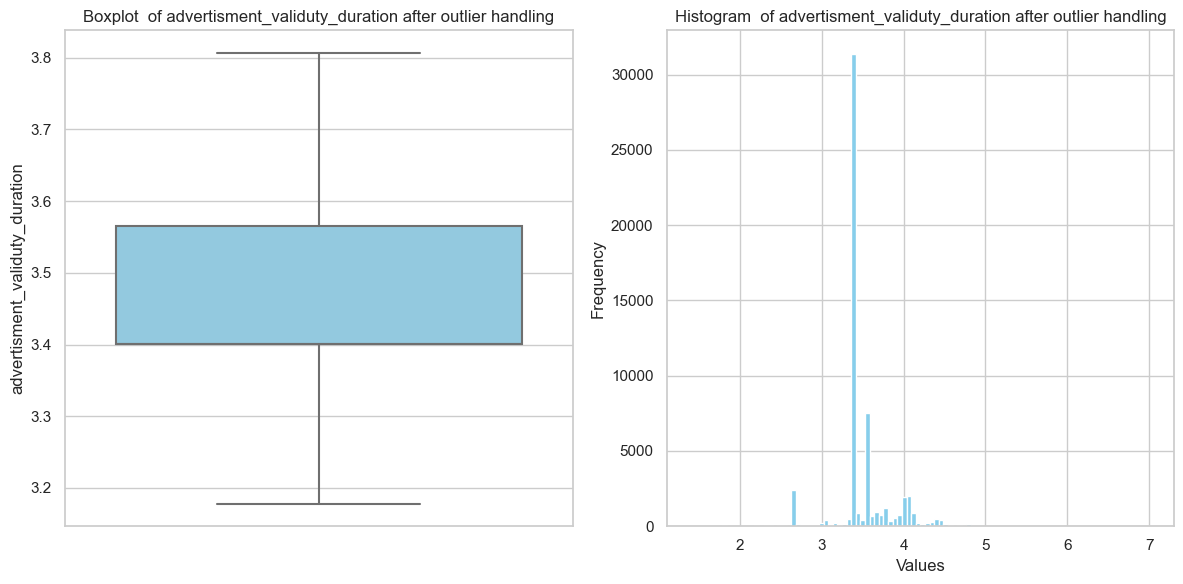

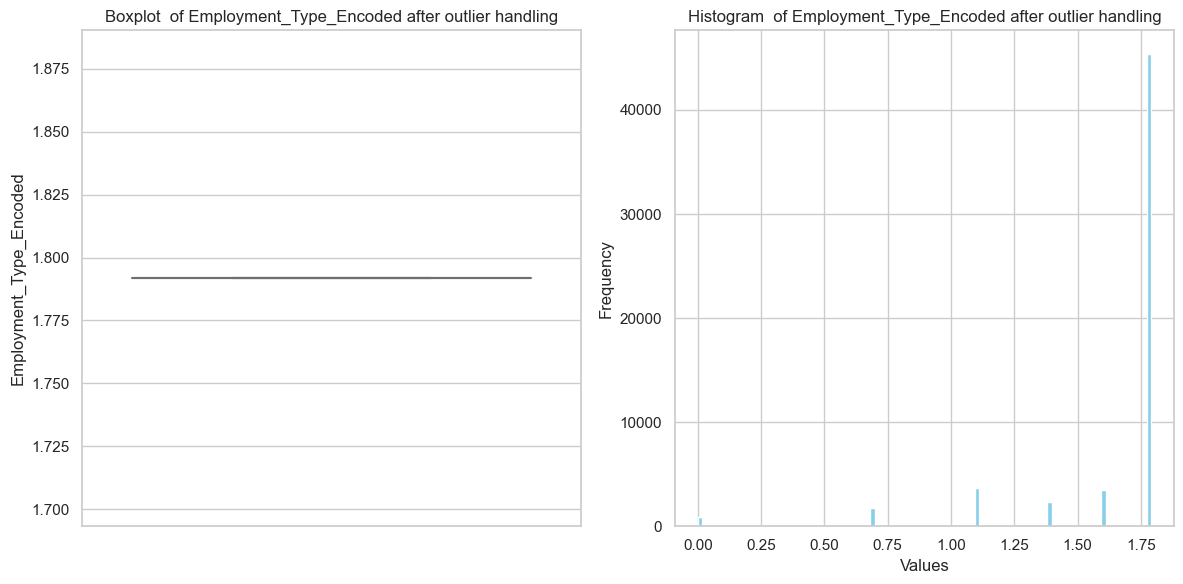

In [499]:
for col in outlier_columns:
  generate_plots(df_log,col, True)

# Step 8: Supervised Learning and Accuracy calculation

In [500]:
# !pip install lightgbm

In [501]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor

In [502]:
# df_yearly = df_1_floor_capped.copy()
# df_yearly['yearly_salary'] = df['Derived_Monthly_Salary'] * 12

In [503]:


# Step 1: Handling Categorical Columns
df_encoded = pd.get_dummies(df_1_floor_capped, columns=['Province and Territories'], drop_first=True)

#For Values after log transform are passed
'''df_encoded = pd.get_dummies(df_log, columns=['Province and Territories'], drop_first=True)'''


# Step 2: Splitting Data
X = df_encoded.drop(columns=['Derived_Monthly_Salary','Title', 'Date Posted', 'Employer', 'Location', 'Salary',
       'Employment Type', 'Start Date', 'Languages', 'Education',
       'Experience', 'Responsibilities', 'url','Work_hours_measure',
       'Salary_measure','Title_and_Responsibilities_Text', 'Job_Field','Work_hours'])  # Features


y = df_encoded['Derived_Monthly_Salary']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training and Evaluation
# models = {
#     "Linear Regression": LinearRegression(),
#     "Decision Tree": DecisionTreeRegressor(),
#     "Random Forest": RandomForestRegressor()
# }

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
#      "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
#     "ElasticNet Regression": ElasticNet(),
    "Gradient Boosting": GradientBoostingRegressor(),
#     "KNN": KNeighborsRegressor()
    
#     "Support Vector Machine": SVR(),
    "LightGBM": lgb.LGBMRegressor()
}



for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print("Model performance for", name)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R^2 Score:", r2)
    print()


Model performance for Linear Regression
Mean Absolute Error: 744.5301585881856
Mean Squared Error: 840557.5252130724
Root Mean Squared Error: 916.8192434788182
R^2 Score: 0.2482744250253197

Model performance for Decision Tree
Mean Absolute Error: 620.3015571863289
Mean Squared Error: 706103.856269211
Root Mean Squared Error: 840.2998609241888
R^2 Score: 0.3685187373567794

Model performance for Random Forest
Mean Absolute Error: 603.0334284998183
Mean Squared Error: 636225.5212446315
Root Mean Squared Error: 797.6374622876182
R^2 Score: 0.4310121777210302

Model performance for Ridge Regression
Mean Absolute Error: 744.5317676950854
Mean Squared Error: 840552.2605017074
Root Mean Squared Error: 916.8163722914788
R^2 Score: 0.24827913335051965

Model performance for Gradient Boosting
Mean Absolute Error: 655.5130660109684
Mean Squared Error: 681016.6541865927
Root Mean Squared Error: 825.2373320364226
R^2 Score: 0.39095466927623

[LightGBM] [Warning] Found whitespace in feature_names, 


Model performance for Linear Regression
Mean Absolute Error: 793.32129405348
Mean Squared Error: 922566.459396355
Root Mean Squared Error: 960.5032323716329
R^2 Score: 0.17493237364536018

Model performance for Decision Tree
Mean Absolute Error: 671.8294018802462
Mean Squared Error: 774342.6079078064
Root Mean Squared Error: 879.9673902525061
R^2 Score: 0.30749160563480205

Model performance for Random Forest
Mean Absolute Error: 656.2661430389354
Mean Squared Error: 706635.7810372398
Root Mean Squared Error: 840.616310237459
R^2 Score: 0.36804302755691964

Model performance for Lasso Regression
Mean Absolute Error: 793.6702755155849
Mean Squared Error: 923159.5224495962
Root Mean Squared Error: 960.8119079453564
R^2 Score: 0.1744019867874459

Model performance for Ridge Regression
Mean Absolute Error: 793.3180760631427
Mean Squared Error: 922564.1811570275
Root Mean Squared Error: 960.502046409599
R^2 Score: 0.17493441111539287

Model performance for ElasticNet Regression
Mean Absolute Error: 805.420701507817
Mean Squared Error: 942868.7767569172
Root Mean Squared Error: 971.0143030650564
R^2 Score: 0.15677564940769617

Model performance for Gradient Boosting
Mean Absolute Error: 704.7340161182698
Mean Squared Error: 742282.608436676
Root Mean Squared Error: 861.5582443669587
R^2 Score: 0.3361634345260065

Model performance for Support Vector Machine
Mean Absolute Error: 849.4194994175259
Mean Squared Error: 1059029.7940422304
Root Mean Squared Error: 1029.0917325691769
R^2 Score: 0.052890781460900094

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 46016, number of used features: 18
[LightGBM] [Info] Start training from score 3813.777998
Model performance for LightGBM
Mean Absolute Error: 671.2093907630048
Mean Squared Error: 694573.8956076965
Root Mean Squared Error: 833.4110004119796
R^2 Score: 0.3788301866600444

## Standardization

In [504]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Regularization try

In [517]:
# Ridge Regularization

regression = Ridge(alpha=0.5)
model = lgb.LGBMRegressor().fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2 train:',r2_train.round(4))
r2_test = r2_score(y_test, y_pred_test)
print('r2 test:',r2_test.round(4))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 46016, number of used features: 18
[LightGBM] [Info] Start training from score 3813.777998
r2 train: 0.4604
r2 test: 0.4459


In [518]:
# Lasso Regularization

regression = Lasso(alpha=0.5)
model = lgb.LGBMRegressor().fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2 train:',r2_train.round(4))
r2_test = r2_score(y_test, y_pred_test)
print('r2 test:',r2_test.round(4))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 46016, number of used features: 18
[LightGBM] [Info] Start training from score 3813.777998
r2 train: 0.4604
r2 test: 0.4459


## Hyperparameter Tuning and Training of Models

In [505]:
from sklearn.model_selection import RandomizedSearchCV

In [506]:
# Define parameter grids for each model
param_randgrid_linear_reg = {}

param_randgrid_ridge = {
#     'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 7.5, 10.0]
    'alpha': [0.01, 0.05]
    
}



param_randgrid_random_forest = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_randgrid_gradient_boosting = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}

param_randgrid_lightgbm = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}

param_randgrid_decision_tree = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


# Perform Grid Search with Cross-Validation for each model
linear_reg = RandomizedSearchCV(LinearRegression(), param_randgrid_linear_reg, cv=3, scoring='r2')
ridge = RandomizedSearchCV(Ridge(), param_randgrid_ridge, cv=3, n_iter=20, random_state=23, scoring='r2')
random_forest = RandomizedSearchCV(RandomForestRegressor(), param_randgrid_random_forest, cv=3, n_iter=20, random_state=23, scoring='r2')
gradient_boosting = RandomizedSearchCV(GradientBoostingRegressor(), param_randgrid_gradient_boosting, cv=3, n_iter=20, random_state=23, scoring='r2')
lightgbm = RandomizedSearchCV(lgb.LGBMRegressor(), param_randgrid_lightgbm, cv=3, n_iter=20, random_state=23, scoring='r2')
decision_tree = RandomizedSearchCV(DecisionTreeRegressor(), param_randgrid_decision_tree, cv=3, n_iter=20, random_state=23, scoring='r2')



# Fit the models with the best hyperparameters
linear_reg.fit(X_train, y_train)
ridge.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
lightgbm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Get the best hyperparameters
best_params_linear_reg = linear_reg.best_params_
best_params_ridge = ridge.best_params_
best_params_random_forest = random_forest.best_params_
best_params_gradient_boosting = gradient_boosting.best_params_
best_params_lightgbm = lightgbm.best_params_
best_params_decision_tree = decision_tree.best_params_

# Get the best models which will contain the best combination of hyperparameters found during the ramdomized search for each model
best_model_linear_reg = linear_reg.best_estimator_
best_model_ridge = ridge.best_estimator_
best_model_random_forest = random_forest.best_estimator_
best_model_gradient_boosting = gradient_boosting.best_estimator_
best_model_lightgbm = lightgbm.best_estimator_
best_model_decision_tree = decision_tree.best_estimator_

C:\Users\TravelMate\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\TravelMate\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\TravelMate\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\TravelMate\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\TravelMate\anaconda3\

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 107
[LightGBM] [Info] Number of data points in the train set: 30677, number of used features: 18
[LightGBM] [Info] Start training from score 3814.773797
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 30677, number of used features: 17
[LightGBM] [Info] Start training from score 3809.931788
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

C:\Users\TravelMate\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [507]:
# Predict using the best models
y_pred_linear_reg = best_model_linear_reg.predict(X_test)
y_pred_ridge = best_model_ridge.predict(X_test)
y_pred_random_forest = best_model_random_forest.predict(X_test)
y_pred_gradient_boosting = best_model_gradient_boosting.predict(X_test)
y_pred_lightgbm = best_model_lightgbm.predict(X_test)
y_pred_decision_tree = best_model_decision_tree.predict(X_test)

In [508]:
LinReg_mse = mean_squared_error(y_test, y_pred_linear_reg)
LinReg_mae = mean_absolute_error(y_test, y_pred_linear_reg)
LinReg_r2 = r2_score(y_test, y_pred_linear_reg)

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)


rf_mse = mean_squared_error(y_test, y_pred_random_forest)
rf_mae = mean_absolute_error(y_test, y_pred_random_forest)
rf_r2 = r2_score(y_test, y_pred_random_forest)

# Evaluate Gradient Boosting Regressor
gb_mse = mean_squared_error(y_test, y_pred_gradient_boosting)
gb_mae = mean_absolute_error(y_test, y_pred_gradient_boosting)
gb_r2 = r2_score(y_test, y_pred_gradient_boosting)


lightgbm_mse = mean_squared_error(y_test, y_pred_lightgbm)
lightgbm_mae = mean_absolute_error(y_test, y_pred_lightgbm)
lightgbm_r2 = r2_score(y_test, y_pred_lightgbm)

decision_tree_mse = mean_squared_error(y_test, y_pred_decision_tree)
decision_tree_mae = mean_absolute_error(y_test, y_pred_decision_tree)
decision_tree_r2 = r2_score(y_test, y_pred_decision_tree)



# Print the results
print("Linear Regression:")
print(f"Mean Squared Error: {LinReg_mse}")
print(f"Mean Absolute Error: {LinReg_mae}")
print(f"R-squared (r2) Score: {LinReg_r2}")
print("\n")

print("Ridge Regression:")
print(f"Mean Squared Error: {ridge_mse}")
print(f"Mean Absolute Error: {ridge_mae}")
print(f"R-squared (r2) Score: {ridge_r2}")
print("\n")


print("Random Forest Regressor:")
print(f"Mean Squared Error: {rf_mse}")
print(f"Mean Absolute Error: {rf_mae}")
print(f"R-squared (r2) Score: {rf_r2}")
print("\n")

print("Gradient Boosting Regressor:")
print(f"Mean Squared Error: {gb_mse}")
print(f"Mean Absolute Error: {gb_mae}")
print(f"R-squared (r2) Score: {gb_r2}")


print("Decision Tree:")
print(f"Mean Squared Error: {decision_tree_mse}")
print(f"Mean Absolute Error: {decision_tree_mae}")
print(f"R-squared (r2) Score: {decision_tree_r2}")

print("LightGbm:")
print(f"Mean Squared Error: {lightgbm_mse}")
print(f"Mean Absolute Error: {lightgbm_mae}")
print(f"R-squared (r2) Score: {lightgbm_r2}")




Linear Regression:
Mean Squared Error: 840557.525213072
Mean Absolute Error: 744.5301585881847
R-squared (r2) Score: 0.24827442502532016


Ridge Regression:
Mean Squared Error: 840557.5174382955
Mean Absolute Error: 744.5301994762426
R-squared (r2) Score: 0.24827443197844123


Random Forest Regressor:
Mean Squared Error: 620264.1758676559
Mean Absolute Error: 599.1926890583821
R-squared (r2) Score: 0.44528669335020743


Gradient Boosting Regressor:
Mean Squared Error: 681016.6541865928
Mean Absolute Error: 655.5130660109684
R-squared (r2) Score: 0.3909546692762299
Decision Tree:
Mean Squared Error: 682560.5416524432
Mean Absolute Error: 637.9295792251777
R-squared (r2) Score: 0.3895739432007974
LightGbm:
Mean Squared Error: 621233.5289522709
Mean Absolute Error: 615.2530026043544
R-squared (r2) Score: 0.4444197836111018


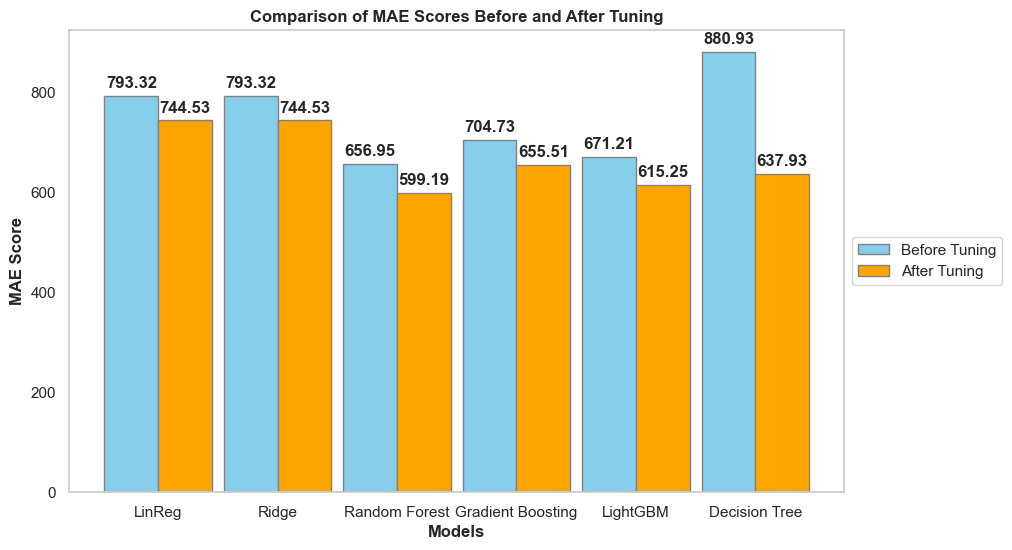

In [509]:



# Define the models and their MAE scores before and after tuning
models = ['LinReg', 'Ridge', 'Random Forest', 'Gradient Boosting', 'LightGBM', 'Decision Tree']
before_tuning = [793.32129405348, 793.3180760631427, 656.9507996533628, 704.7340161182697,671.2093907630048,880.9255094464835]
after_tuning = [LinReg_mae, ridge_mae, rf_mae, gb_mae,lightgbm_mae,decision_tree_mae]

# Define the colors for bars
colors = ['skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue']  # Before tuning (skyblue)
colors_after = ['orange', 'orange', 'orange', 'orange', 'orange', 'orange']  # After tuning (orange)

# Set the width of the bars
bar_width = 0.45

# Set the positions of the bars on the x-axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, before_tuning, color=colors, width=bar_width, edgecolor='grey', label='Before Tuning')
plt.bar(r2, after_tuning, color=colors_after, width=bar_width, edgecolor='grey', label='After Tuning')

# Add annotations above each bar for MAE scores before tuning
for i, score in enumerate(before_tuning):
    plt.text(i, score + 10, f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

# Add annotations above each bar for MAE scores after tuning
for i, score in enumerate(after_tuning):
    plt.text(i + bar_width, score + 10, f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('MAE Score', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.title('Comparison of MAE Scores Before and After Tuning', fontweight='bold')

# Remove background grid
plt.grid(False)

# Place legend outside of the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()


In [510]:
#Perform cross-validation and calculate the mean r2 score (the goodness of fit of the model) for the different regression models.
#provides an indication of how well the model fits the data, with higher values indicating better fit.
#The output helps to understand which model performs better on the given training data.
from sklearn.model_selection import cross_val_score

models = [
    ('Linear Regression', best_model_linear_reg),
    ('Ridge Regression', best_model_ridge),
    ('Random Forest Regressor', best_model_random_forest),
    ('Gradient Boosting Regressor', best_model_gradient_boosting),
     ('Light GBM', best_model_lightgbm),
    ('Decision Tree', best_model_decision_tree)
]

print('Cross validation mean r2 score')
for name, model in models:
    result = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    print(name, ':', result.mean())


Cross validation mean r2 score
Linear Regression : 0.24288881752522115
Ridge Regression : 0.24288881841352197
Random Forest Regressor : 0.4378900903914162
Gradient Boosting Regressor : 0.3887663195666697
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 107
[LightGBM] [Info] Number of data points in the train set: 41414, number of used features: 18
[LightGBM] [Info] Start training from score 3811.999653
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 107
[LightGBM] [Info] Number of data points in the train set: 41414, number of used features: 18
[LightGBM] [Info] Start training fro

## Feature Importance

                           Feature  Importance
17     Province and Territories_YT    0.000000
12     Province and Territories_NU    0.000000
11     Province and Territories_NT    0.000000
14     Province and Territories_PE    0.002061
7      Province and Territories_MB    0.003605
9      Province and Territories_NL    0.004663
16     Province and Territories_SK    0.005827
13     Province and Territories_ON    0.006153
8      Province and Territories_NB    0.013739
10     Province and Territories_NS    0.015330
6      Province and Territories_BC    0.022372
15     Province and Territories_QC    0.038900
5          Employment_Type_Encoded    0.047786
1   advertisment_validuty_duration    0.056157
0                        Vacancies    0.066576
2               Experience_encoded    0.162285
4                Job_Field_Encoded    0.248234
3                Education_Encoded    0.306314


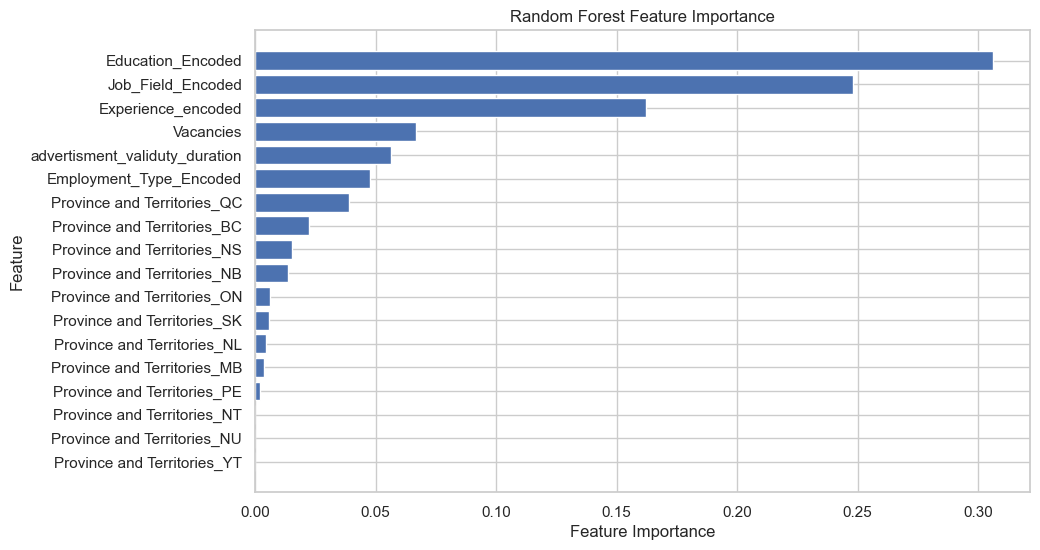

In [511]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)  # Sort in descending order
print(feature_importance_df)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

                           Feature  Importance
17     Province and Territories_YT    0.000000
12     Province and Territories_NU    0.000000
11     Province and Territories_NT    0.000000
14     Province and Territories_PE    0.002061
7      Province and Territories_MB    0.003605
9      Province and Territories_NL    0.004663
16     Province and Territories_SK    0.005827
13     Province and Territories_ON    0.006153
8      Province and Territories_NB    0.013739
10     Province and Territories_NS    0.015330
6      Province and Territories_BC    0.022372
15     Province and Territories_QC    0.038900
5          Employment_Type_Encoded    0.047786
1   advertisment_validuty_duration    0.056157
0                        Vacancies    0.066576
2               Experience_encoded    0.162285
4                Job_Field_Encoded    0.248234
3                Education_Encoded    0.306314


Text(0, 0.5, 'Feature')

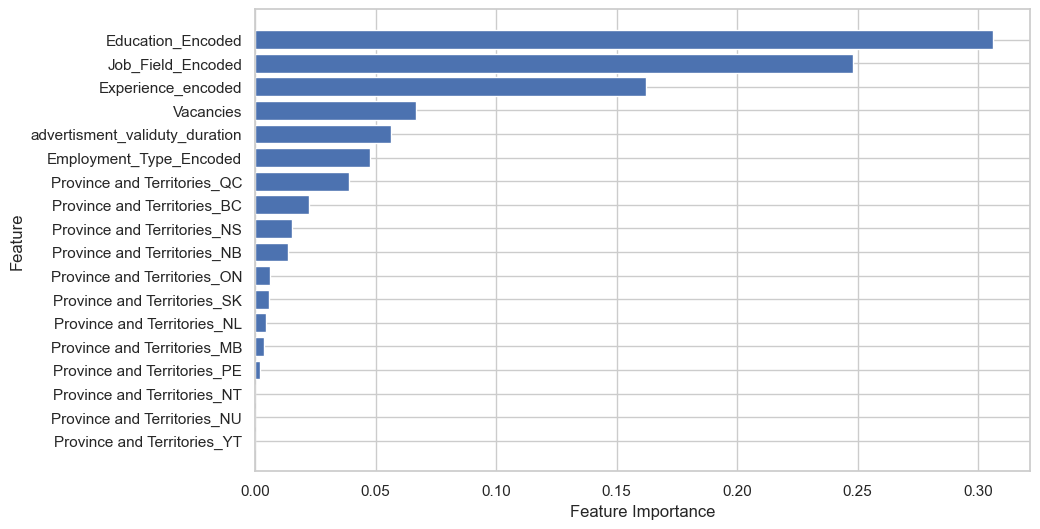

In [512]:
# Create and view DataFrame for feature importances
feature_importance_df2 = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})
feature_importance_df2 = feature_importance_df2.sort_values(by='Importance', ascending=True)  # Sort in descending order
print(feature_importance_df2)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_df2)), feature_importance_df2['Importance'], align='center')
plt.yticks(range(len(feature_importance_df2)), feature_importance_df2['Feature'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

## Insights

#### Metrics

In [ ]:
Random Forest Regressor:

Mean Squared Error (MSE): 
R-squared (r2) Score: 
Cross-validation Score: 
    
    
    
Gradient Boosting Regressor:

Mean Squared Error (MSE): 

R-squared (r2) Score: 

Cross-validation Score: 

#### Model Comparison

Metrics/results are compared between the Random Forest Regressor and Gradient Boosting Regressor, as both models had the best performnce out of the 5 models.

Mean Squared Error (MSE):
Lower MSE indicates better model performance. In this case, Gradient Boosting has a lower MSE compared to Random Forest. Therefore, Gradient Boosting performs better in terms of minimizing prediction errors.

R-squared (r2) Score:
R-squared measures how well the model explains the variance in the target variable. Higher R-squared indicates a better fit. Gradient Boosting has a higher R-squared (___________) compared to Random Forest (_______), suggesting that Gradient Boosting explains more of the variance in the target variable.

Cross-validation Score:
Cross-validation provides an estimate of how well the model generalizes to unseen data. The cross-validation score is slightly higher for Random Forest compared to Gradient Boosting . However, we cannot directly compare the absolute values of cross-validation scores between models.

#### Model Selection:

Both models perform well, but based on the considered metrics, Gradient Boosting Regressor seems to be the better choice. It has lower Mean Squared Error, a higher R-squared score, and a slightly lower cross-validation score. Gradient Boosting is often preferred for its ability to capture complex relationships in the data, and in this case, it appears to provide a good fit to the training data.

Based on the analysis, Gradient Boosting Regressor is identified as the preferred model due to lower MSE, higher R-squared, and acceptable cross-validation score.

The machine learning model, Gradient Boosting Regressor, provides a solid foundation for predicting salaries in the United States.

#### Potential Steps and Obstacles:

Further Evaluation: further evaluation the models on a test dataset is important to confirm their performance on unseen data.

Model Interpretability: Improving model interpretability is important, especially since the model is intended for use by hiring managers who may need insights into how features contribute to salary predictions.

Fine-Tuning: Explore opportunities for hyperparameter tuning to potentially enhance model performance.

Data Quality: Improve data quality used for training and testing the model. Address any missing values or outliers that might affect model performance.

User Feedback: Collect feedback from hiring managers using the model to identify areas for improvement and additional features that could enhance prediction accuracy.

In [ ]:
# Save model
'''
import joblib

#Save chosen model to a .pkl file
model = best_model_gradient_boosting
model_filename = 'gradient_boosting_regressor_salary_prediction_model.pkl'
joblib.dump(model, model_filename)'''




In [ ]:
# User Testing

'''


# Load the saved model
saved_model = joblib.load('gradient_boosting_regressor_salary_prediction_model.pkl')

# Create a DataFrame with a single data point
user_data = pd.DataFrame({
    'title': ['Sales Representative'],
    'experience': [3],
    'industry': ['Real Estate'],
    'state': ['NY'],
    'company_size': [2],
    'benefits': [1],
    'work_type_Full-time': [1],
    'work_type_Part-time': [0],
    'work_type_Temporary': [0],
    'remote_allowed_Yes': [0]
})

#Encoding
user_data['industry'] = ce.TargetEncoder(cols=['industry']).fit(jobs[['industry']], jobs['yearly_salary']).transform(user_data[['industry']])['industry']
user_data['state'] = ce.TargetEncoder(cols=['state']).fit(jobs[['state']], jobs['yearly_salary']).transform(user_data[['state']])['state']
user_data['title'] = ce.TargetEncoder(cols=['title']).fit(jobs[['title']], jobs['yearly_salary']).transform(user_data[['title']])['title']
#user_data['experience'] = LabelEncoder().fit_transform(user_data['experience'])
#user_data['company_size'] = LabelEncoder().fit_transform(user_data['company_size'])
#user_data['benefits'] = LabelEncoder().fit_transform(user_data['benefits'])
#user_data = pd.concat([user_data, pd.get_dummies(user_data['work_type'], prefix='work_type')], axis=1).drop(['work_type'], axis=1)
#user_data = pd.concat([user_data, pd.get_dummies(user_data['remote_allowed'], drop_first=True, prefix='remote_allowed')], axis=1).drop(['remote_allowed'], axis=1)

# Make predictions on the single data point
prediction = saved_model.predict(user_data)

# Print the predicted salary
print(f'Predicted Salary: {prediction[0]}')

'''

In [513]:
# PCA approach to see if r2 score incrases
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Handling Categorical Columns
df_encoded = pd.get_dummies(df_1_floor_capped, columns=['Province and Territories'], drop_first=True)

# Step 2: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Applying PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Step 4: Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 5: Model Training and Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
   "Ridge Regression": Ridge(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "LightGBM": lgb.LGBMRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print("Model performance for", name)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R^2 Score:", r2)
    print()


Model performance for Linear Regression
Mean Absolute Error: 751.6300336302661
Mean Squared Error: 849197.9963421671
Root Mean Squared Error: 921.5193955322737
R^2 Score: 0.24054709770655658

Model performance for Decision Tree
Mean Absolute Error: 631.3829884790215
Mean Squared Error: 736116.2298980427
Root Mean Squared Error: 857.9721614936249
R^2 Score: 0.34167813674854697

Model performance for Random Forest
Mean Absolute Error: 606.6595884367297
Mean Squared Error: 641762.0116617727
Root Mean Squared Error: 801.1005003504696
R^2 Score: 0.4260607956712267

Model performance for Ridge Regression
Mean Absolute Error: 751.6307625444879
Mean Squared Error: 849197.9470391329
Root Mean Squared Error: 921.5193687813257
R^2 Score: 0.24054714179913883

Model performance for Gradient Boosting
Mean Absolute Error: 672.8504145344447
Mean Squared Error: 701542.2345689328
Root Mean Squared Error: 837.5811808827445
R^2 Score: 0.37259827693925995

[LightGBM] [Info] Auto-choosing col-wise multi-thr

In [232]:
# RFE

In [514]:
from sklearn.feature_selection import RFE

# Step 1: Handling Categorical Columns
df_encoded = pd.get_dummies(df_1_floor_capped, columns=['Province and Territories'], drop_first=True)

# Step 2: Splitting Data
X = df_encoded.drop(columns=['Derived_Monthly_Salary','Title', 'Date Posted', 'Employer', 'Location', 'Salary',
       'Employment Type', 'Start Date', 'Languages', 'Education',
       'Experience', 'Responsibilities', 'url','Work_hours_measure',
       'Salary_measure','Title_and_Responsibilities_Text', 'Job_Field','Work_hours'])  # Features
y = df_encoded['Derived_Monthly_Salary']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling (Optional, but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply Recursive Feature Elimination (RFE)
estimator = RandomForestRegressor()  # Choose your estimator
rfe = RFE(estimator, n_features_to_select=10)  # Choose the number of features to select
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Step 5: Model Training and Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Ridge Regression": Ridge(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "LightGBM": lgb.LGBMRegressor()
}

for name, model in models.items():
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print("Model performance for", name)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R^2 Score:", r2)
    print()


Model performance for Linear Regression
Mean Absolute Error: 745.4448177032027
Mean Squared Error: 842328.2356618865
Root Mean Squared Error: 917.7844167678412
R^2 Score: 0.24669084711384837

Model performance for Decision Tree
Mean Absolute Error: 621.6839885184265
Mean Squared Error: 698582.9437320706
Root Mean Squared Error: 835.812744418312
R^2 Score: 0.37524482347430366

Model performance for Random Forest
Mean Absolute Error: 606.2549606794522
Mean Squared Error: 640970.6473075668
Root Mean Squared Error: 800.606424722889
R^2 Score: 0.426768526916663

Model performance for Ridge Regression
Mean Absolute Error: 745.4457271582141
Mean Squared Error: 842328.1787668605
Root Mean Squared Error: 917.7843857719854
R^2 Score: 0.24669089799608412

Model performance for Gradient Boosting
Mean Absolute Error: 654.965739549632
Mean Squared Error: 681247.0192315191
Root Mean Squared Error: 825.3768952615036
R^2 Score: 0.39074864971105205

[LightGBM] [Info] Auto-choosing row-wise multi-threadi

In [234]:
# Hyperparameter tuning done

In [ ]:
#  TRY RIDGE AND LASSO REGULARIZATION

## 8.1 Result Comparison

Model performance for Linear Regression
Mean Absolute Error: 783.8077673528779
Mean Squared Error: 900761.8642710948
Root Mean Squared Error: 949.0847508368759
R^2 Score: 0.19443261166115966

Model performance for Decision Tree
Mean Absolute Error: 670.6453729024408
Mean Squared Error: 808723.6568852938
Root Mean Squared Error: 899.2906409416779
R^2 Score: 0.27674402080497984

Model performance for Random Forest
Mean Absolute Error: 642.2803932693527
Mean Squared Error: 692358.857536585
Root Mean Squared Error: 832.0810402458314
R^2 Score: 0.3808111346828167

# Step 9: Using NLP and Machine Learning to find best Matching Job for a candidate

In [235]:
df[['Location','Languages','Education', 'Experience']][:2]

,Location,Languages,Education,Experience
1,"Mississauga, ON",English,Secondary/School Level,1 to less than 7 months
2,"Bradford, ON",English,Secondary/School Level,2 years to less than 3 years


In [236]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')


In [237]:
def preprocess_text(text):
    text = str(text)
    # convert to lowercase
    text = text.lower()

    text = clean_text(text)

    # Tokenization
    tokens = word_tokenize(text)

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]


    # lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Reconstruct the cleaned text
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# function to handle text processing and return clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[\w\.-]+@[\w\.-]+', '', text)  # Remove emails
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [238]:
# apply preprocessing in data and add it as a new column
df['job_description_text'] = df['Title'] + ' ' + df['Employer'] + ' ' + df['Location']+ df['Languages'] + ' ' + df['Education']+ ' ' + df['Job_Field']

In [239]:
# apply preprocessing in data and add it as a new column
df['job_description_text'] = df['job_description_text'].apply(preprocess_text)

In [240]:
df['job_description_text'].head()

1    cabinetmaker sympro mfg inc mississauga onengl...
2    restoration carpenter supra restoration servic...
3    painter majestic renovation bradford onenglish...
5    store manager retail professional book fair to...
6    administrative assistant urban decor furnishin...
Name: job_description_text, dtype: object

In [241]:
def generate_word_cloud(data, title, bg_color):
    if isinstance(data, list):
      data = ' '.join(data)

    wordcloud = WordCloud(width=800, height=400, random_state=42, max_words=100,
                          background_color=bg_color).generate(data)


    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

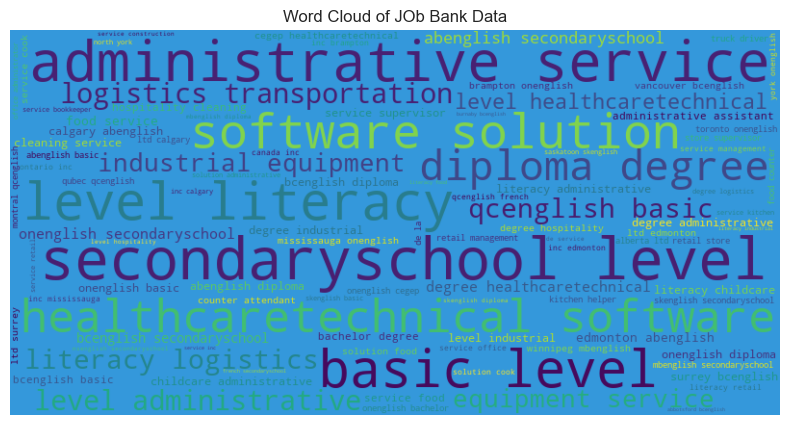

In [242]:
text = " ".join(i for i in df.job_description_text)
wordcloud = WordCloud().generate(text)
generate_word_cloud(text, 'Word Cloud of JOb Bank Data' , '#3498db') #95A3A2

In [243]:
df_job_match = df[:1000]

In [244]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_job_match['job_description_text'])

# Convert TF-IDF matrix to sparse CSR format
tfidf_matrix_sparse = csr_matrix(tfidf_matrix)

# Computing cosine similarity matrix
cosine_sim_sparse = cosine_similarity(tfidf_matrix_sparse, dense_output=False)

print("Similarity Matrix:")
print(cosine_sim_sparse)


Similarity Matrix:
  (0, 585)	0.02182782374568066
  (0, 71)	0.0209834364017606
  (0, 994)	0.023315781554876475
  (0, 987)	0.06231700739036467
  (0, 980)	0.004915805616149487
  (0, 962)	0.0032504237056188334
  (0, 953)	0.024083444110383243
  (0, 948)	0.03553069995323351
  (0, 940)	0.005185395659900821
  (0, 932)	0.026903144025840237
  (0, 921)	0.00537092721567806
  (0, 911)	0.09496650038093635
  (0, 907)	0.019706773360321242
  (0, 906)	0.004412722049917628
  (0, 905)	0.024803135002847025
  (0, 903)	0.004840895719549617
  (0, 896)	0.03058191575195133
  (0, 887)	0.004597063821357023
  (0, 883)	0.005235651873412768
  (0, 880)	0.023876989056331135
  (0, 873)	0.022981610830245122
  (0, 869)	0.004161321373397569
  (0, 853)	0.006407600701567387
  (0, 849)	0.005142320635949199
  (0, 844)	0.004699311591488499
  :	:
  (999, 66)	0.11291903984585473
  (999, 55)	0.5139966306509627
  (999, 21)	0.2786908292515311
  (999, 13)	0.3886127446589337
  (999, 11)	0.316202327281762
  (999, 8)	0.222353894141084

In [245]:
#searching best matching job
# user_query = "line cook job ontario"
user_query = "software engineer job"


# Process user query
processed_query = preprocess_text(user_query)

# Vectorize user query
query_vector = tfidf_vectorizer.transform([processed_query])

# Calculate cosine similarity between user query vector and descriptions
similarity_scores = cosine_similarity(query_vector, tfidf_matrix)

# Rank listings based on similarity scores
ranked_indices = similarity_scores.argsort()[0][::-1]  # Sort indices in descending order of similarity scores

# Return top N results to the user
top_n = 5  # Number of results to return
top_listings = df_job_match.iloc[ranked_indices[:top_n]]



In [246]:
# Printing  top listings
print("Top Search Results:")
top_listings

Top Search Results:


,Title,Date Posted,Employer,Location,Salary,Employment Type,Start Date,Vacancies,Languages,Education,...,Province and Territories,Derived_Monthly_Salary,advertisment_validuty_duration,Title_and_Responsibilities_Text,Job_Field,Experience_encoded,Education_Encoded,Job_Field_Encoded,Employment_Type_Encoded,job_description_text
834,"counsellor, job",2024-03-12,Canoe Therapy,"Burlington, ON",80.00 HOUR,Full time,Starts as soon as possible,1.0,English,Basic level of literacy,...,ON,12800.000000,35.334534,"counsellor, job",Childcare and Administrative Services,0.0,1,8,5,counsellor job canoe therapy burlington onengl...
715,embedded software engineer,2024-03-26,Soneil Electronics,"Brampton, ON","70,000 YEAR",Permanent Full Time,Starts as soon as possible,1.0,English,Basic level of literacy,...,ON,5833.333333,35.334534,embedded software engineer,Healthcare/Technical Software Solutions,0.0,1,11,6,embedded software engineer soneil electronics ...
428,software engineer,2024-03-09,SAI INFO TECH,"Mississauga, ON",50.50 HOUR,Permanent Full Time,Starts as soon as possible,1.0,English,CEGEP,...,ON,8080.000000,30.000000,software engineer Collect and document user's ...,Healthcare/Technical Software Solutions,5.0,4,11,6,software engineer sai info tech mississauga on...
702,software design engineer,2024-02-28,Alpha Infotech Ltd.,"Oakville, ON",53.00 HOUR,Permanent Full Time,Starts as soon as possible,1.0,English,Bachelor Degree,...,ON,8480.000000,47.000000,software design engineer Collect and document ...,Healthcare/Technical Software Solutions,5.0,6,11,6,software design engineer alpha infotech ltd oa...
1183,third-class stationary engineer,2024-03-26,Valbruna ASW Inc.,"Welland, ON",33.96 HOUR,Permanent Full Time,Starts as soon as possible,1.0,English,Basic level of literacy,...,ON,5433.600000,35.334534,third-class stationary engineer,Logistics and Transportation,0.0,1,9,6,thirdclass stationary engineer valbruna asw in...



1. **Salary Prediction Model**: Build a regression model to predict salaries based on features such as job title, industry, and work hours. You can experiment with algorithms like Linear Regression, Random Forest Regression, or Gradient Boosting Regressor (e.g., LightGBM).





2. **Career Path Recommender**: Create a system that recommends potential career paths based on an individual's current job title, skills, and desired salary. This could involve analyzing career progression patterns within industries and suggesting paths for advancement.


3. **Salary Negotiation Assistant**: Develop a tool to assist job seekers in negotiating salary offers. This could involve analyzing salary data for similar positions and industries and providing personalized recommendations for negotiation strategies.



In [ ]:
#Todo:
'''NLP technique refine and show two result at least eg. line cook, dentistry etc.
refine hyperparameter and analyse using the hint from bookmarked related link
save model and also read and predict 
reporting'''

In [ ]:
# Best model select and calculate the feature importance of that model
# yearly salary and try with that instead of monthly
# Ridge regularization